In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Load the datasets

In [2]:
train_path = os.path.join('data', 'train.csv')
test_path = os.path.join('data', 'test.csv')
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)



# --- Basic Information ---

In [ ]:
print("--- Train Data ---")
print(train.info())
print("\n--- Test Data ---")
print(test.info())

print("\n--- Train Data Head ---")
print(train.head())

print("\n--- Test Data Head ---")
print(test.head())

print("\n--- Train Data Describe ---")
print(train.describe())

print("\n--- Test Data Describe ---")
print(test.describe())

--- Train Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None

--- Test Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Cou

# --- Missing Values ---

In [ ]:


print("\n--- Missing Values in Train Data ---")
print(train.isnull().sum())

print("\n--- Missing Values in Test Data ---")
print(test.isnull().sum())


--- Missing Values in Train Data ---
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

--- Missing Values in Test Data ---
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


## Results
Only one missing value in test data for 'winddirection'


# --- Target Variable Analysis ---


--- Rainfall Distribution ---
rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


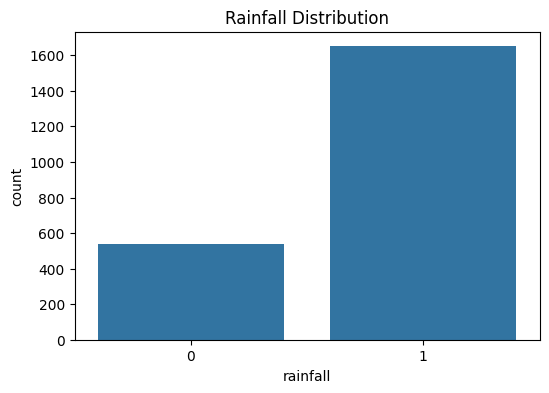

In [ ]:


print("\n--- Rainfall Distribution ---")
print(train['rainfall'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='rainfall', data=train)
plt.title('Rainfall Distribution')
plt.show()

## Results

* **1 (Rain):** 75.34% of the samples in your training data have rainfall.
* **0 (No Rain):** 24.66% of the samples in your training data do not have rainfall.

* **Imbalanced Dataset:** The dataset is imbalanced. There is a significantly higher proportion of samples with rainfall (1) compared to samples without rainfall (0).


# --- Feature Distribution Analysis ---

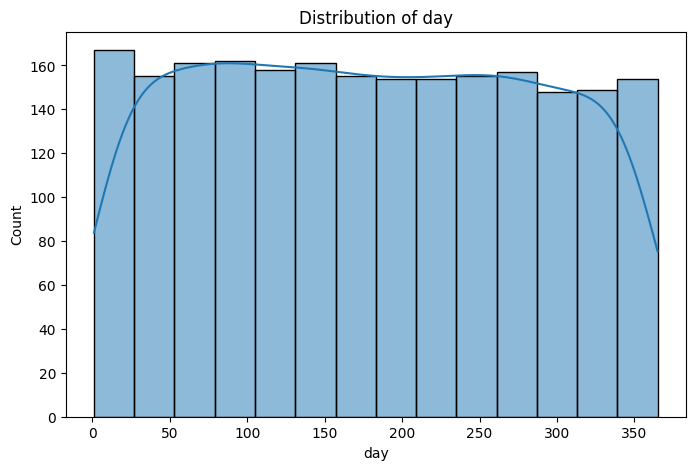

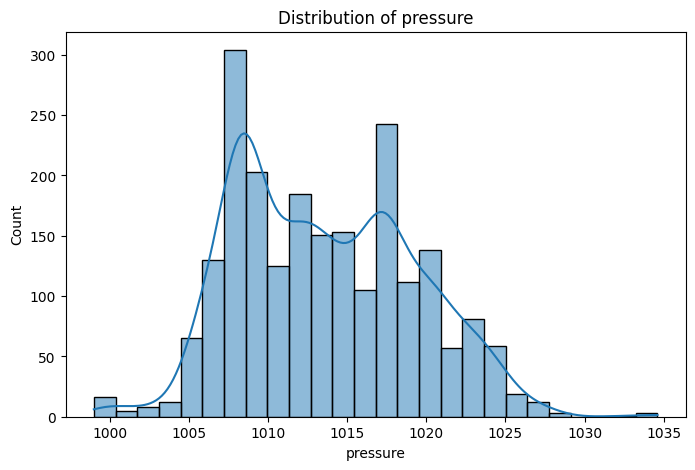

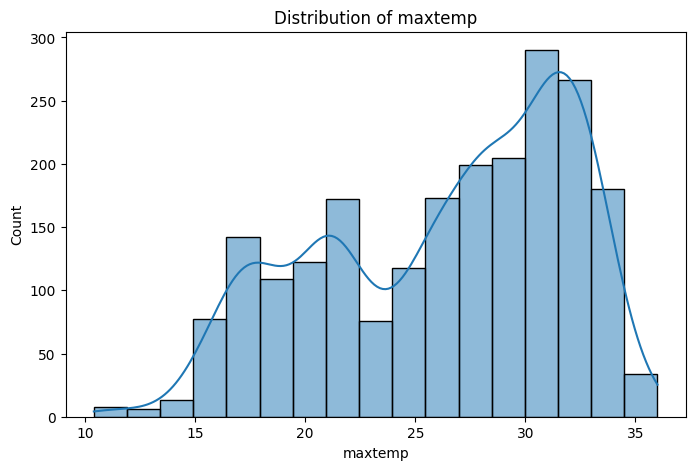

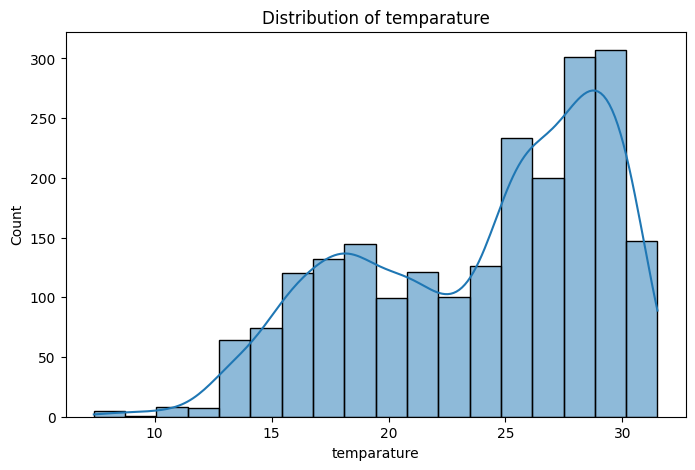

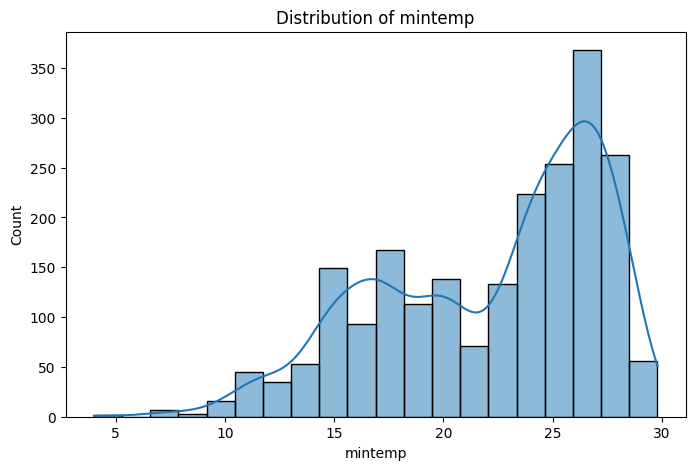

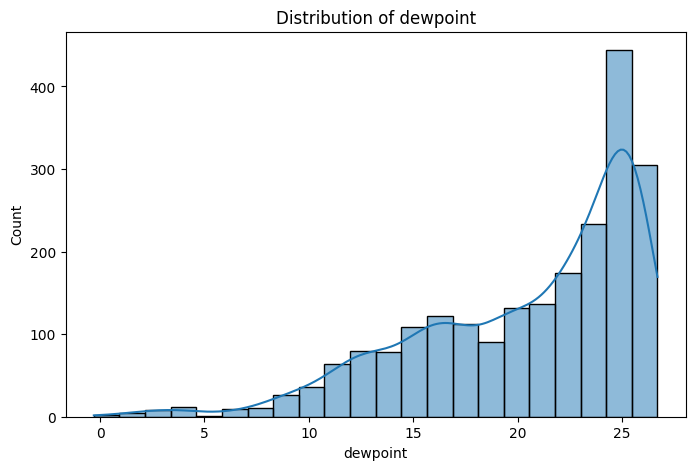

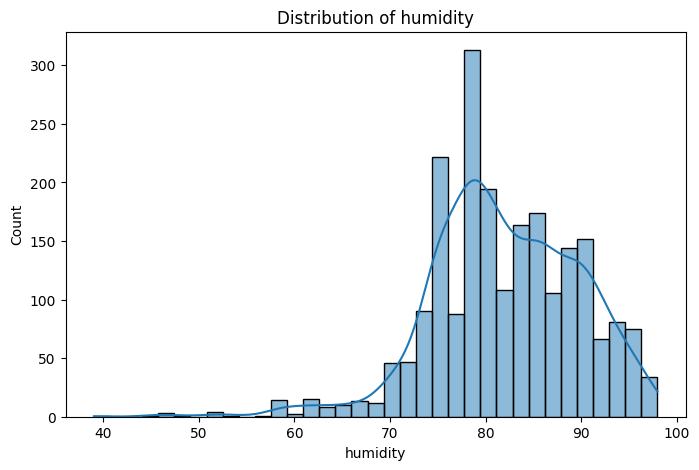

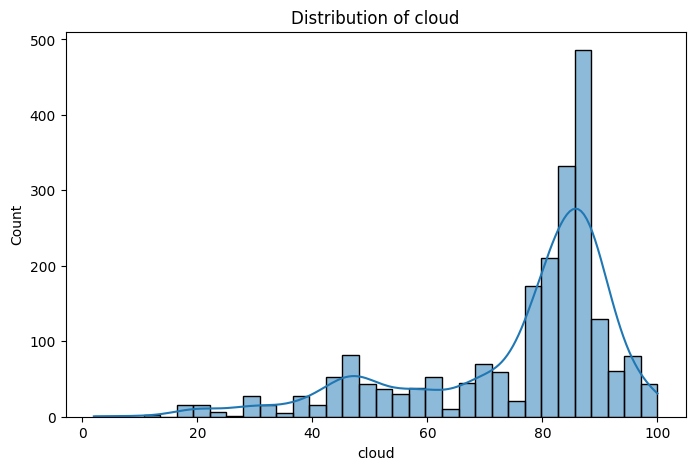

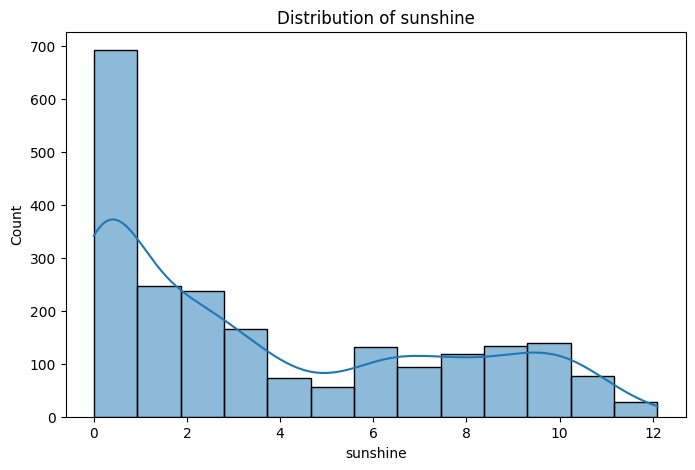

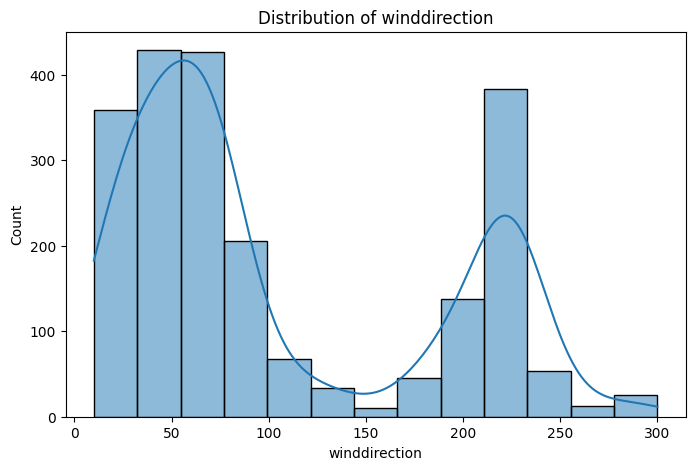

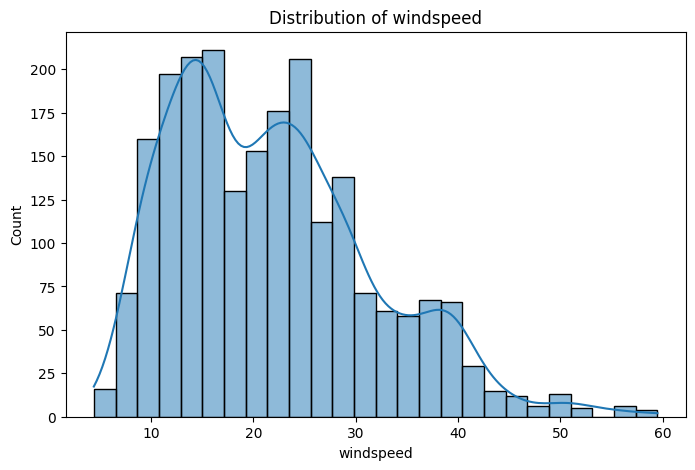

In [ ]:
numerical_features = train.drop(['rainfall', 'id'], axis=1).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


## **Conclusion: Examination of Feature Distributions**

The examination of the feature distributions in this dataset revealed several key characteristics that warrant careful consideration during data preprocessing and modeling.

* **Bimodal Distributions:** Several features, including `pressure`, `maxtemp`, `temparature`, `mintemp`, `windspeed`, and `winddirection`, exhibited bimodal distributions. This suggests the presence of distinct underlying regimes or patterns within these features, potentially linked to different weather systems or seasonal variations.
* **Skewness:** Features like `dewpoint`, `humidity`, `sunshine`, and `cloud` displayed significant skewness. `dewpoint` was right-skewed, while `humidity` and `cloud` were left-skewed, and `sunshine` had extreme right skewness due to a heavy concentration of data at zero. This skewness could impact model performance and requires appropriate transformations.
* **Potential Outliers:** Several features showed potential outliers, particularly in temperature-related features (`maxtemp`, `temparature`, `mintemp`) and `windspeed`. These outliers should be investigated and handled appropriately.
* **Cyclic Nature:** The `day` and `winddirection` features exhibit a cyclic nature. Encoding these features using sine and cosine transformations could help the model capture this cyclical pattern.
* **Discreteness:** some of the features appear to have some level of discreteness, where the data points appear to fall into distinct, and rounded intervals.
* **High concentration of specific values:** The sunshine and cloud features displayed a high concentration of datapoints at specific values, 0 for sunshine, and high values for cloud.
* **Implications for Modeling:**
    * The bimodality in several features suggests the need for careful feature engineering to capture these distinct patterns.
    * Skewness requires appropriate transformations to improve model performance.
    * Outlier handling is crucial to prevent adverse effects on model training.
    * The cyclic nature of `day` and `winddirection` should be addressed through appropriate encoding.
    * The discreteness, and high concentrations of data, should be considered when feature engineering, and selecting models.
* **Further Investigation:** Further analysis is needed to explore the relationships between these feature distributions and the target variable (`rainfall`), as well as the relationships between the features themselves. Domain knowledge related to local weather patterns should be leveraged to inform feature engineering and modeling decisions.

In summary, the feature distributions highlight the complexity of the dataset and the need for careful preprocessing and feature engineering to build an effective rainfall prediction model.


# --- Feature Relationships with Target ---

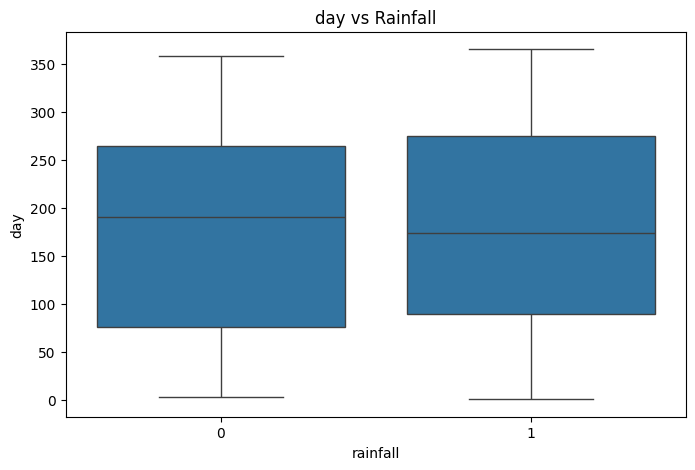

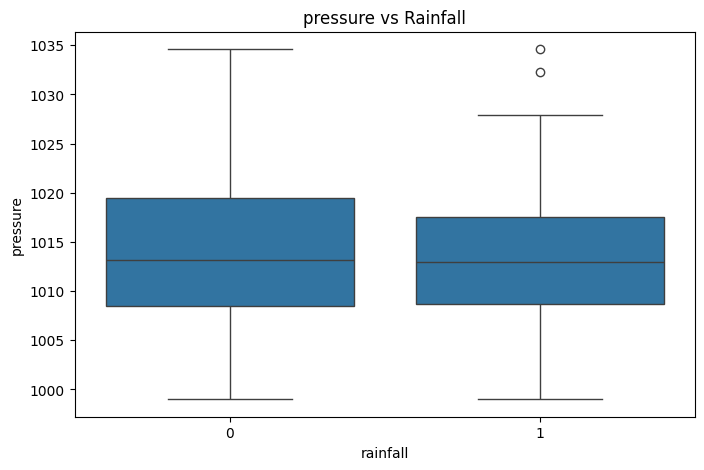

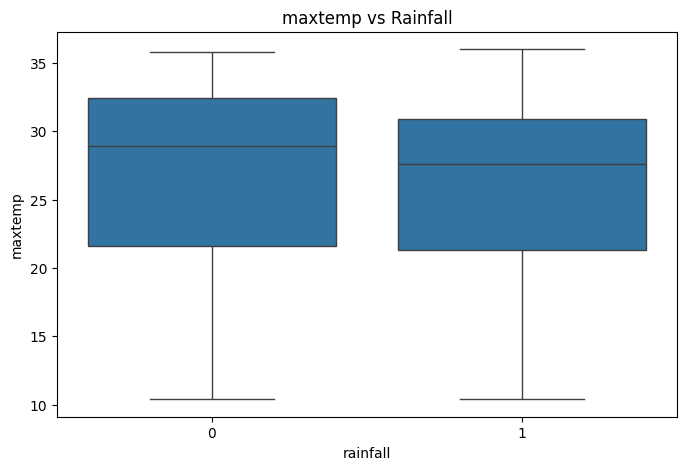

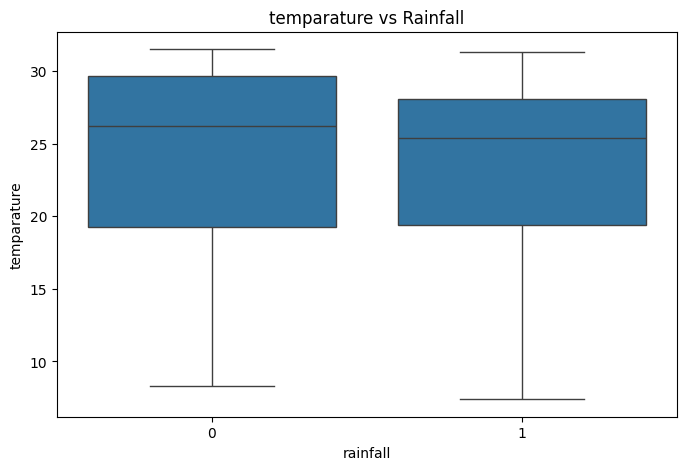

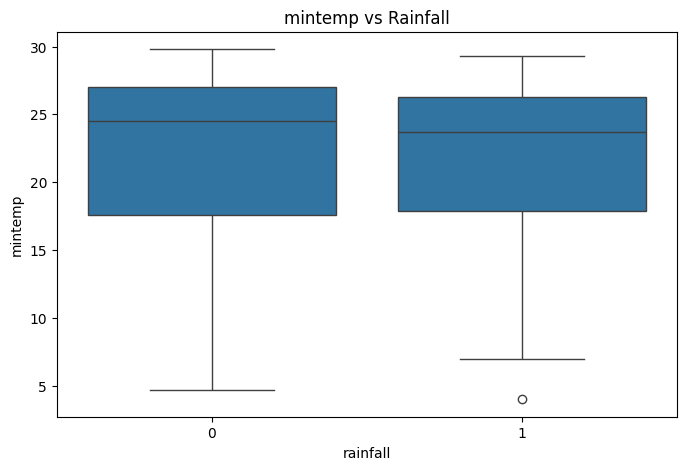

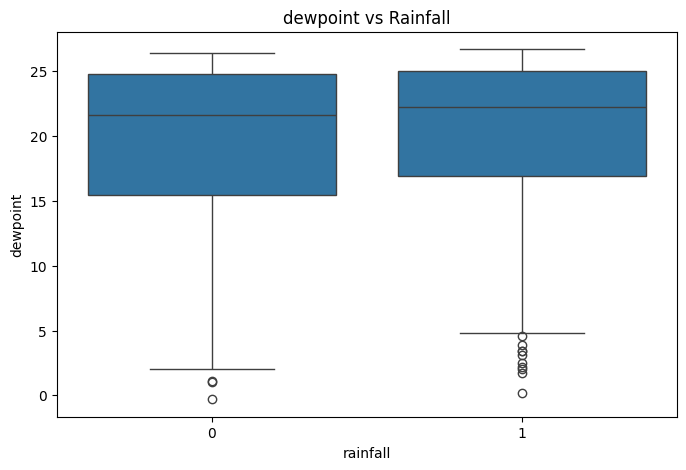

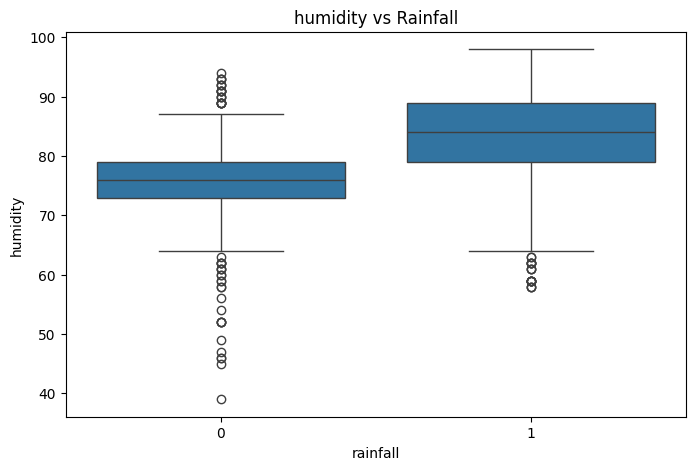

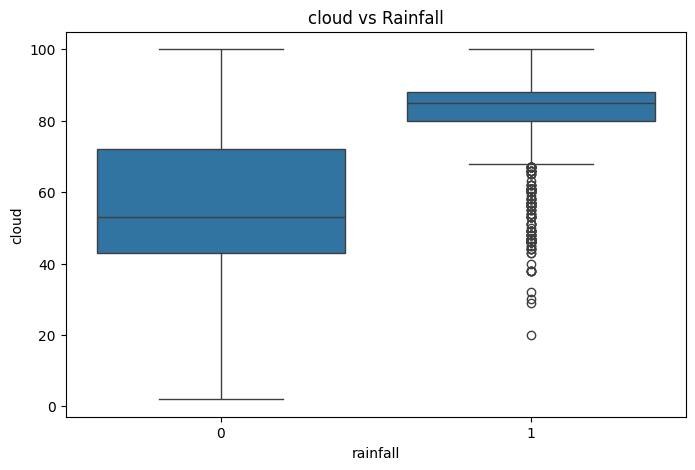

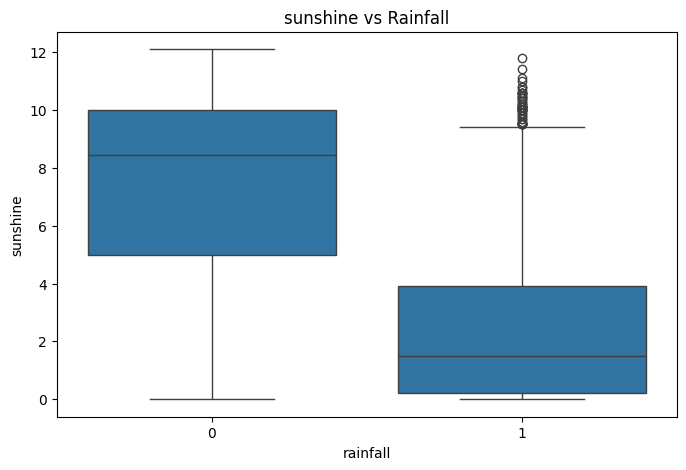

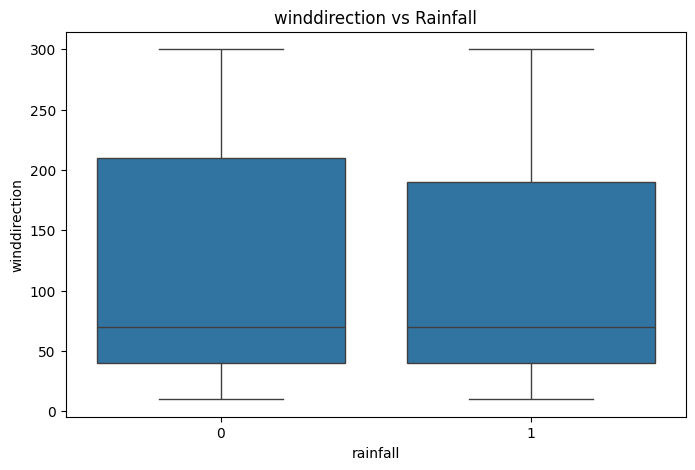

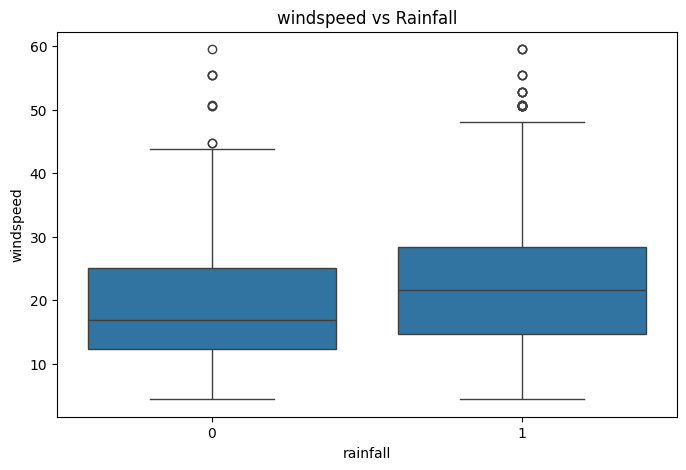

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='rainfall', y=feature, data=train)
    plt.title(f'{feature} vs Rainfall')
    plt.show()

## **Conclusion: Examination of Feature Relationships with Target (Rainfall)**

The analysis of feature relationships with the target variable "rainfall" revealed varying degrees of association, highlighting the importance of certain features in predicting rainfall.

* **Strong Relationships:**
    * The "cloud" feature exhibited a strong positive relationship with rainfall. Higher cloud cover was significantly associated with rainfall.
    * The "sunshine" feature showed a strong negative relationship with rainfall. Lower sunshine hours were strongly associated with rainfall.
    * The "humidity" feature also showed a relatively strong positive relationship with rainfall, with higher humidity correlated with rainfall.

* **Weak but Potentially Informative Relationships:**
    * Features like "pressure," "maxtemp," "temparature," "mintemp," and "windspeed" showed weak but potentially informative relationships. Generally, slightly lower temperatures and slightly higher wind speeds were associated with rainfall, and slightly lower pressure.
    * The "dewpoint" feature also showed a weak, but potentially informative relationship. Higher dewpoints were slightly associated with rainfall.

* **Weak or No Clear Relationships:**
    * The "day" and "winddirection" features showed weak or no clear linear relationships with rainfall. However, the cyclic nature of these features might reveal patterns when transformed appropriately.

* **Outlier Presence:**
    * Several features, including "windspeed," "cloud," "sunshine", and "mintemp" exhibited significant outliers. These outliers require careful investigation and handling.

* **Feature Importance:**
    * "cloud," "sunshine," and "humidity" appear to be the most influential features in predicting rainfall.
    * Temperature-related features, pressure, and windspeed, may provide some predictive power, especially when combined.
    * Day and winddirection require feature engineering to potentially show predictive power.

* **Implications for Modeling:**
    * The strong relationships observed for "cloud," "sunshine," and "humidity" suggest that these features should be given high importance in the model.
    * The weak relationships observed for other features indicate that they might be more useful when combined with other features or transformed appropriately.
    * Outlier handling is crucial for preventing adverse effects on model training.
    * The bimodal nature of many features should be considered when feature engineering.
    * The skewness of the humidity, cloud, dewpoint, and sunshine features should be addressed.
    * The cyclic nature of the day and winddirection features, should be addressed with sine and cosine transformations.

In conclusion, while some features demonstrate strong relationships with rainfall, others require careful consideration and potential transformation to maximize their predictive power. The presence of outliers further emphasizes the need for thorough data preprocessing.


# --- Correlation Analysis ---

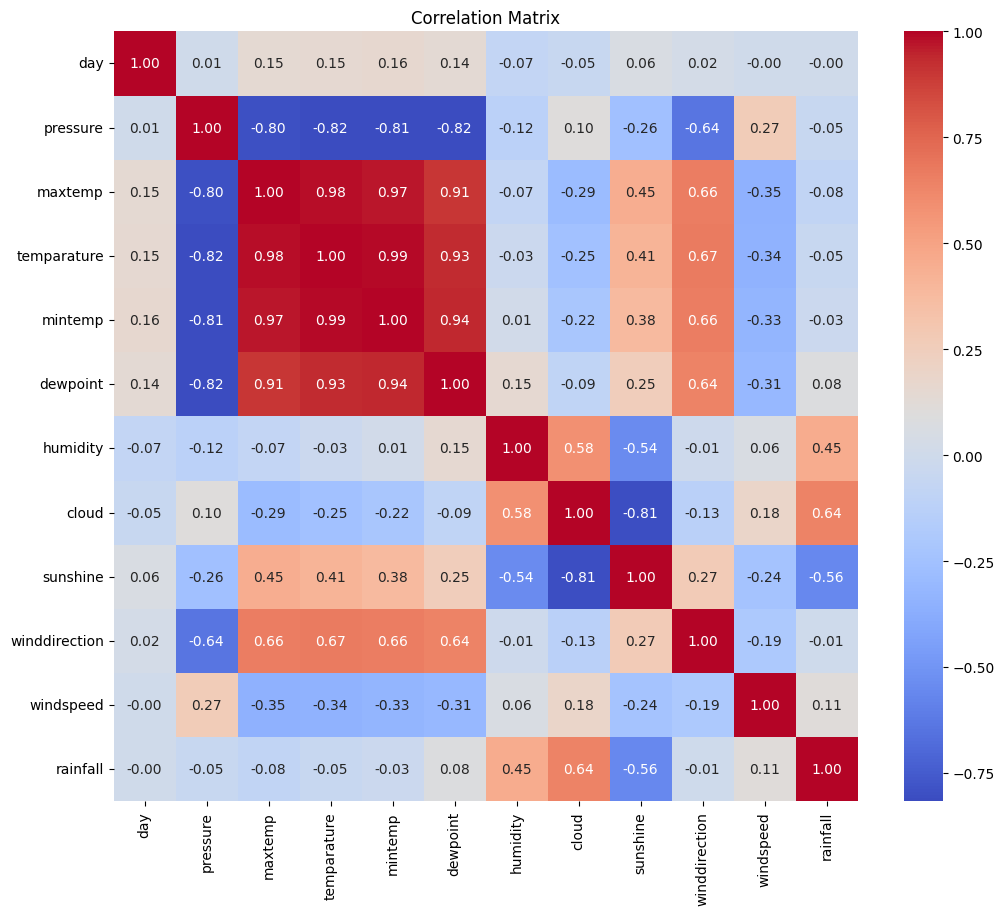

In [ ]:
correlation_matrix = train.drop('id', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Correlation Matrix Heatmap Analysis**


**Observations and Insights:**

1.  **High Correlations Among Temperature-Related Features:**
    * "maxtemp," "temparature," and "mintemp" show very high positive correlations (close to 1) with each other. This is expected, as these features are closely related.
    * "dewpoint" also shows high positive correlations with these temperature features.
2.  **High Negative Correlation Between Pressure and Temperature:**
    * "pressure" shows a strong negative correlation with "maxtemp," "temparature," and "mintemp." This suggests that lower pressure is associated with higher temperatures.
3.  **Moderate Positive Correlation Between Humidity and Dewpoint:**
    * "humidity" and "dewpoint" show a moderate positive correlation. This is expected, as dewpoint is a measure of moisture content, which is related to humidity.
4.  **Strong Negative Correlation Between Sunshine and Cloud:**
    * "sunshine" and "cloud" show a strong negative correlation. This is also expected, as more clouds typically mean less sunshine.
5.  **Weak Correlations with Rainfall:**
    * "rainfall" shows relatively weak correlations with most features.
    * "humidity" and "cloud" show a moderate positive correlation with rainfall, this is consistent with the box plot analysis.
    * "sunshine" has a moderate negative correlation with rainfall, also consistent with the box plot analysis.
    * Temperature and pressure related features have a very weak negative correlation with rainfall.
6.  **Wind Direction:**
    * Wind direction has a very weak correlation with rainfall.
7.  **Day:**
    * Day has a very weak correlation with all other features, and rainfall.
8.  **Windspeed:**
    * Windspeed has a very weak correlation with rainfall.

**Implications for Modeling:**

* **Multicollinearity:** The high correlations among temperature-related features ("maxtemp," "temparature," "mintemp," "dewpoint") indicate multicollinearity. This can negatively impact the performance of some models (e.g., linear regression). Consider removing or combining these features.
* **Feature Importance:** "humidity," "cloud," and "sunshine" appear to be the most important features based on their correlations with "rainfall."
* **Feature Engineering:** Consider creating interaction features or polynomial features to capture non-linear relationships.
* **Dimensionality Reduction:** Techniques like PCA could be used to reduce the dimensionality of the data and address multicollinearity.

**In summary:**

The correlation matrix reveals strong relationships among temperature-related features, a strong negative correlation between sunshine and cloud, and moderate correlations between humidity/cloud and rainfall. Multicollinearity is a concern and should be addressed. The features with the highest correlation to rainfall are cloud, sunshine, and humidity.


# --- Test Data Distributions vs Train ---

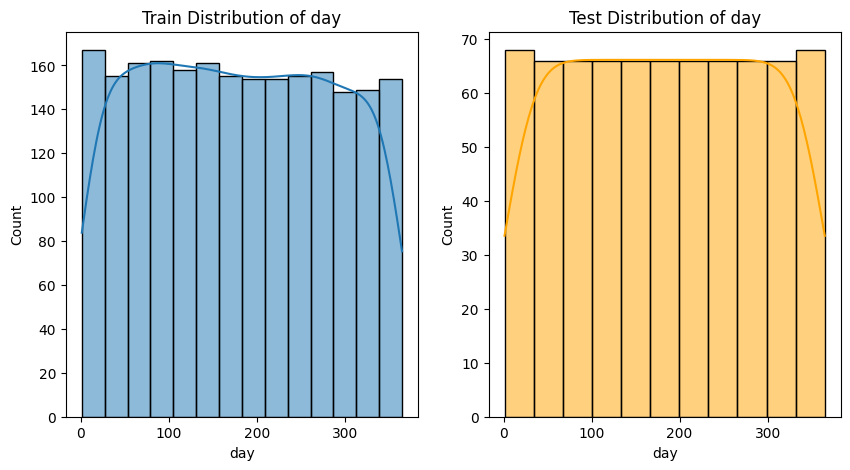

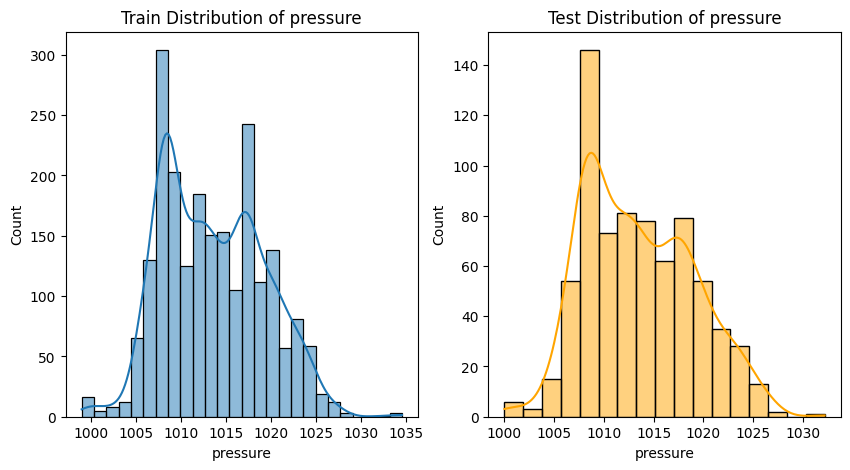

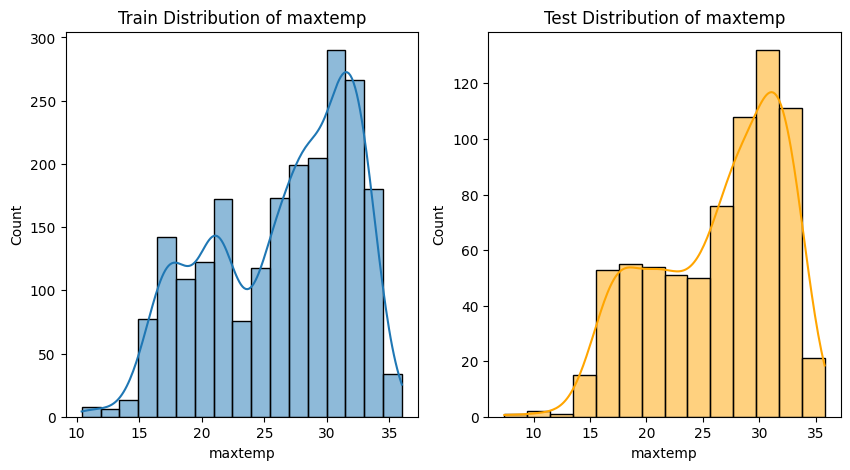

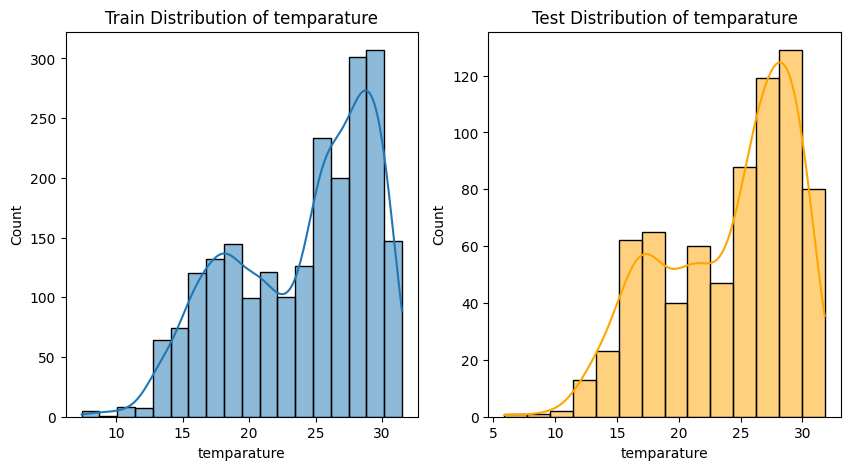

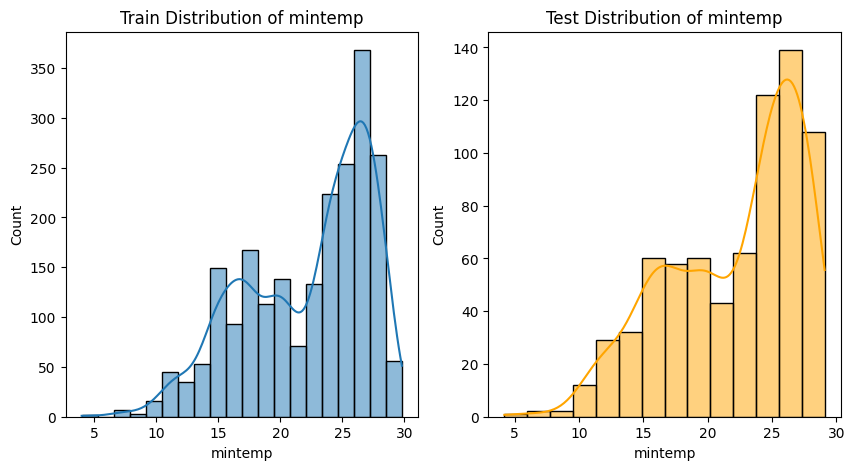

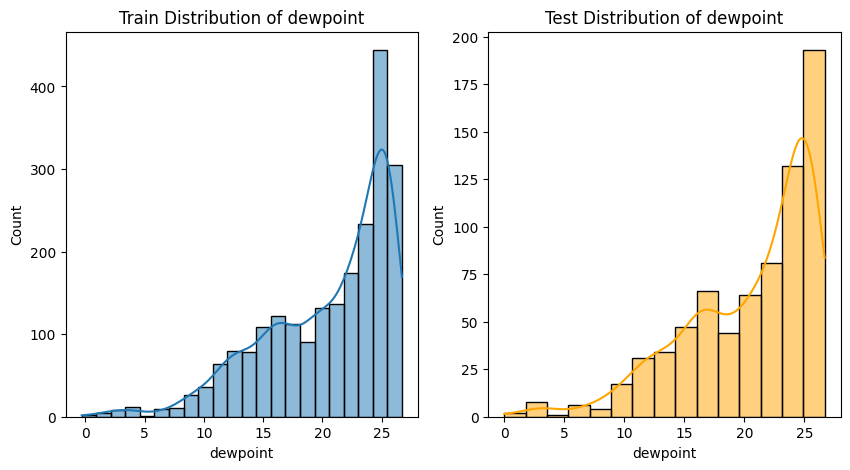

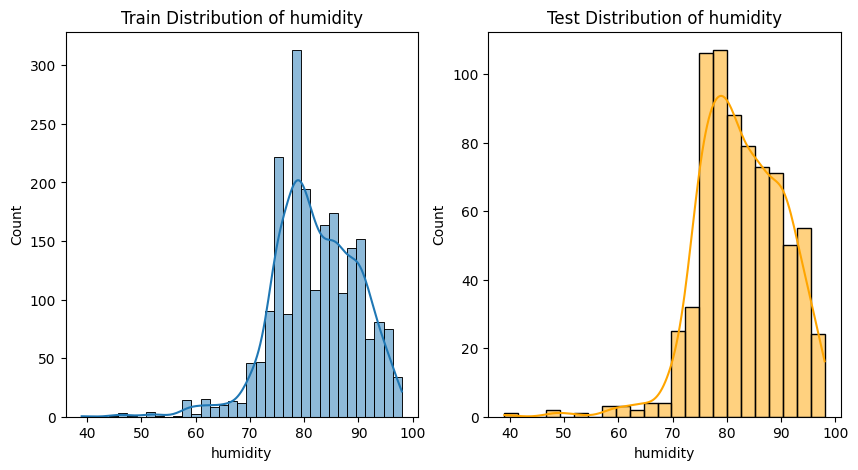

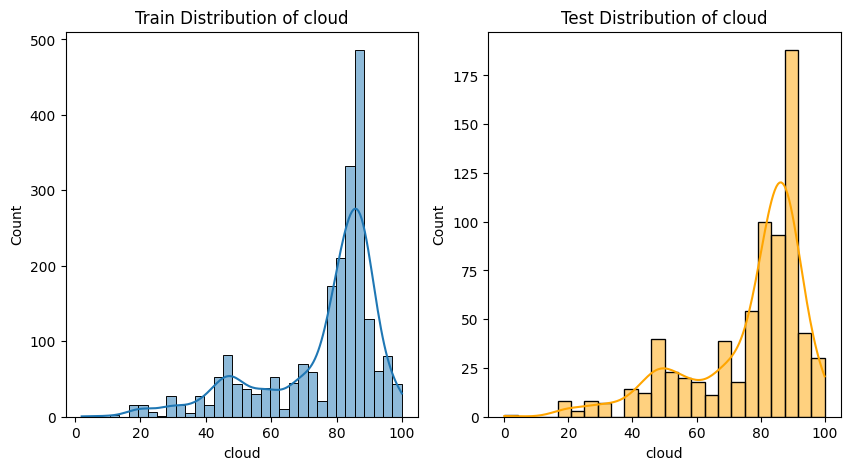

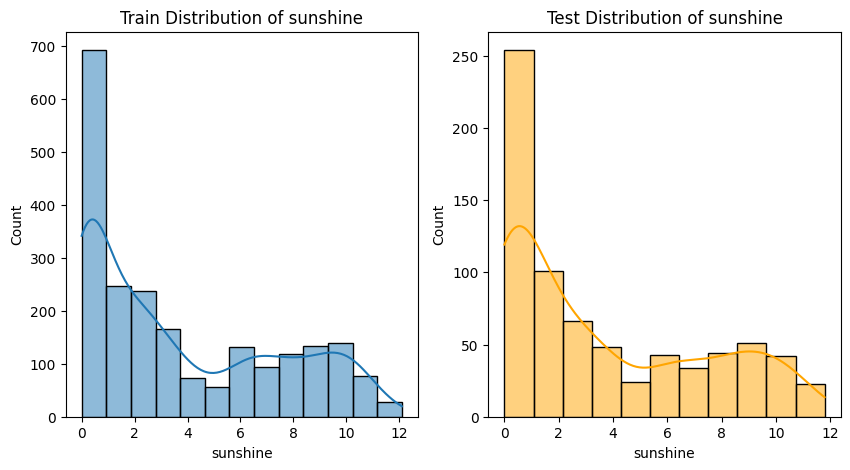

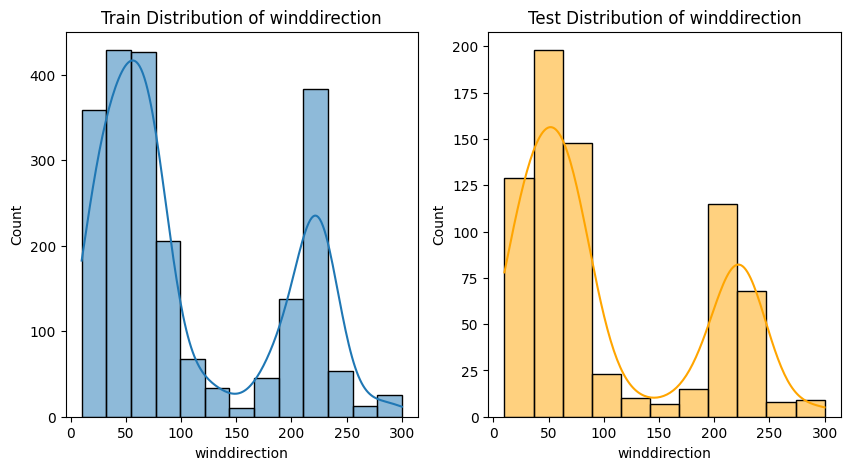

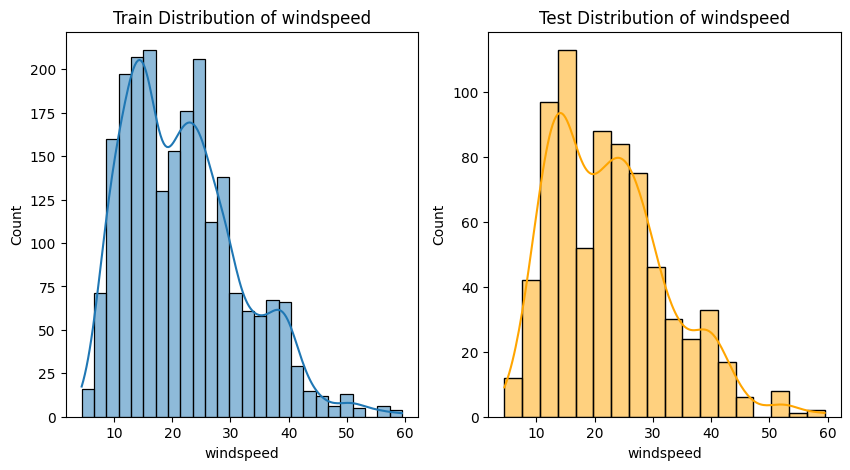

In [ ]:
for feature in numerical_features:
  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.histplot(train[feature], kde = True, label = "Train")
  plt.title(f'Train Distribution of {feature}')
  plt.subplot(1,2,2)
  sns.histplot(test[feature], kde=True, label = "Test", color = 'orange')
  plt.title(f'Test Distribution of {feature}')
  plt.show()

## **Conclusion: Examination of Test Data Distributions vs. Train Data Distributions**

The comparison of feature distributions between the train and test datasets revealed some important considerations for model development and evaluation.

* **Potential Distribution Shifts:** Several features, including `pressure`, `maxtemp`, `temparature`, `mintemp`, `dewpoint`, `humidity`, `cloud`, `sunshine`, `winddirection`, and `windspeed`, exhibited potential distribution shifts between the train and test sets. While the overall shapes of the distributions were similar, the relative prominence of peaks, the concentration of data points in certain ranges, and the degree of skewness differed. These shifts, although potentially minor in some cases, could impact the model's generalization performance on the test data.

* **Consistent Distributions:** The `day` feature showed a remarkably consistent distribution between the train and test sets, indicating representative sampling across the year.

* **Implications for Modeling:**
    * **Distribution Shift Awareness:** The observed distribution shifts necessitate awareness of potential performance discrepancies between train and test results.
    * **Feature Engineering Consistency:** Feature engineering techniques, such as outlier handling, skewness correction, and categorical encoding, must be applied consistently across both train and test sets to avoid introducing further discrepancies.
    * **Potential Need for Distribution Shift Correction:** Depending on the chosen model and the severity of the shifts, distribution shift correction techniques might be beneficial.
    * **Cyclic Feature Handling:** The cyclic nature of features like `day` and `winddirection` should be addressed consistently across both datasets, even if the distributions appear similar.
    * **Bimodal Feature Handling:** The bimodal nature of many features should be handled consistently across train and test.

* **Further Investigation:**
    * The root causes of the distribution shifts should be investigated. This could involve examining the data collection process, potential temporal variations, or other factors.
    * The impact of the observed shifts on model performance should be evaluated through rigorous cross-validation and test set evaluation.

In summary, while the train and test datasets generally exhibit similar feature distributions, potential distribution shifts in several features warrant careful consideration during model development and evaluation. Consistent feature engineering and potential distribution shift correction techniques are crucial for ensuring robust model performance.


# --- Feature Ranges ---

In [ ]:
for feature in numerical_features:
    print(f"Feature: {feature}")
    print(f"  Train Range: {train[feature].min()} to {train[feature].max()}")
    print(f"  Test Range: {test[feature].min()} to {test[feature].max()}")
    print("-" * 20)

Feature: day
  Train Range: 1 to 365
  Test Range: 1 to 365
--------------------
Feature: pressure
  Train Range: 999.0 to 1034.6
  Test Range: 1000.0 to 1032.2
--------------------
Feature: maxtemp
  Train Range: 10.4 to 36.0
  Test Range: 7.4 to 35.8
--------------------
Feature: temparature
  Train Range: 7.4 to 31.5
  Test Range: 5.9 to 31.8
--------------------
Feature: mintemp
  Train Range: 4.0 to 29.8
  Test Range: 4.2 to 29.1
--------------------
Feature: dewpoint
  Train Range: -0.3 to 26.7
  Test Range: -0.0 to 26.7
--------------------
Feature: humidity
  Train Range: 39.0 to 98.0
  Test Range: 39.0 to 98.0
--------------------
Feature: cloud
  Train Range: 2.0 to 100.0
  Test Range: 0.0 to 100.0
--------------------
Feature: sunshine
  Train Range: 0.0 to 12.1
  Test Range: 0.0 to 11.8
--------------------
Feature: winddirection
  Train Range: 10.0 to 300.0
  Test Range: 10.0 to 300.0
--------------------
Feature: windspeed
  Train Range: 4.4 to 59.5
  Test Range: 4.5 to 5

## **Feature Range Analysis**

* **Consistent Ranges:**
    * `day`, `humidity`, and `winddirection` have identical ranges in both the train and test sets. This indicates a good consistency in the sampling of these features.

* **Slightly Different Ranges:**
    * `pressure`, `maxtemp`, `temparature`, `mintemp`, `dewpoint`, `cloud`, `sunshine`, and `windspeed` have slightly different ranges between the train and test sets. These differences are generally small and might not be a major concern, but they should be noted.

* **Implications for Modeling:**

    * **Scaling/Normalization:** Features with significantly different ranges might require scaling or normalization to ensure that they contribute equally to the model. This is especially important for models sensitive to feature scales (e.g., k-nearest neighbors, support vector machines).
    * **Outlier Handling:** Differences in ranges might indicate the presence of outliers in either the train or test set. Consistent outlier handling is crucial for robust model performance.
    * **Potential Distribution Shifts:** The slight differences in ranges can further support the observation of potential distribution shifts between the train and test sets, as identified in the distribution plots.
    * **Data Leakage:** If the ranges are significantly different, it could be a sign of data leakage, however, in this case, the differences are small, so this is not likely.

* **Feature-Specific Observations:**

    * **`day`:** The identical range (1 to 365) confirms that both train and test sets cover the entire year.
    * **Temperature-Related Features (`maxtemp`, `temparature`, `mintemp`):** The slight variations in the ranges of these features might be due to natural fluctuations in temperature.
    * **`dewpoint`:** The test set has a slightly higher minimum dewpoint.
    * **`cloud`:** The test set has a minimum cloud cover of 0, whereas the train set has a minimum of 2.
    * **`sunshine`:** The test set has a slightly lower maximum sunshine duration.

**In summary:**

The feature ranges are generally consistent between the train and test sets, with only minor variations. These variations, along with the potential distribution shifts identified earlier, should be considered during data preprocessing and model development. Scaling/normalization and consistent outlier handling are crucial for robust model performance.


# --- Potential Outlier checks ---

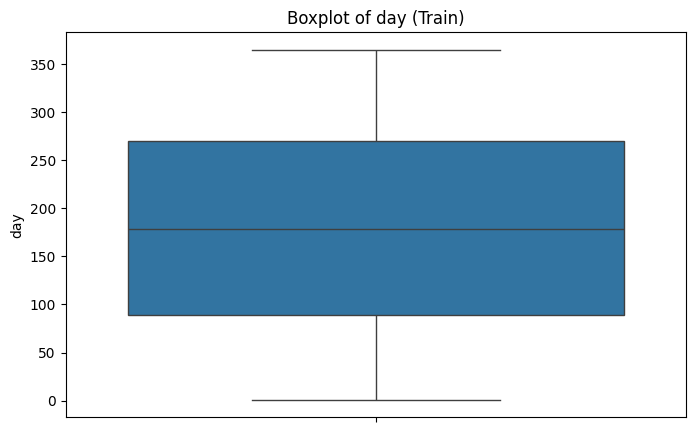

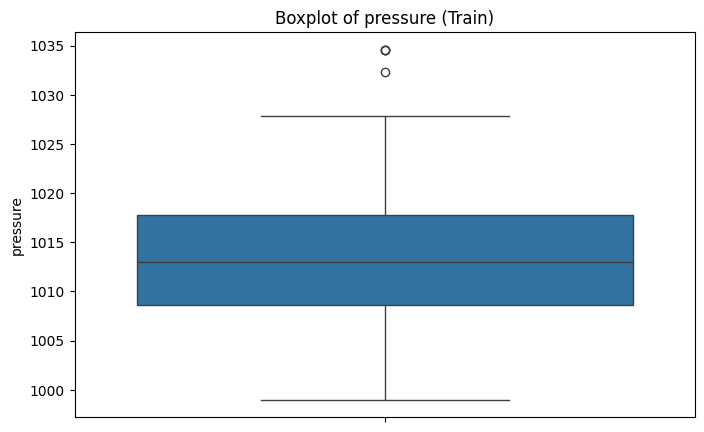

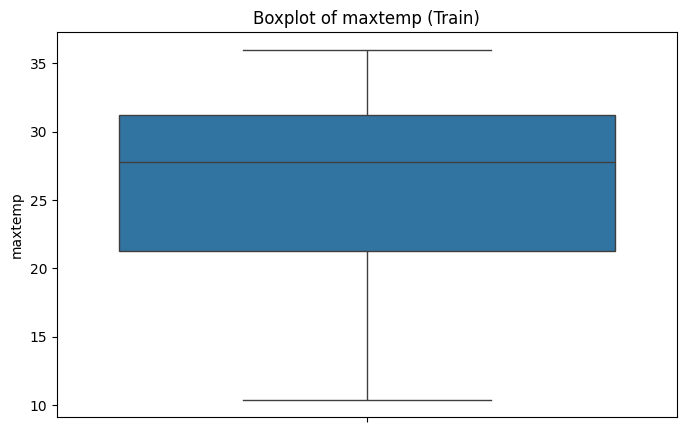

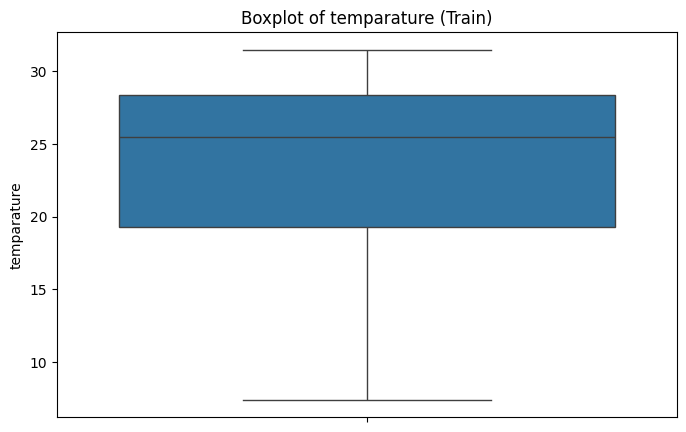

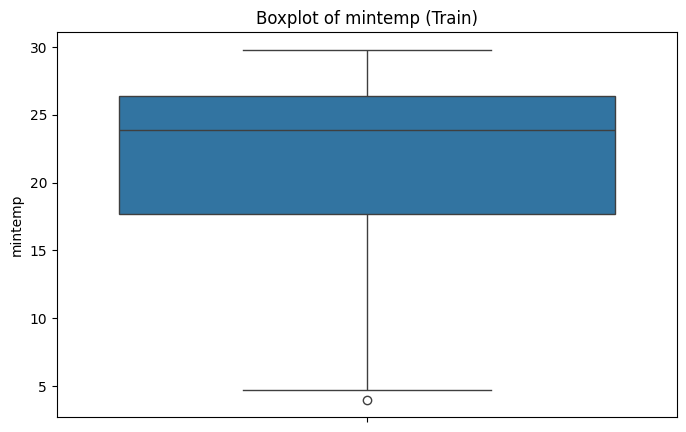

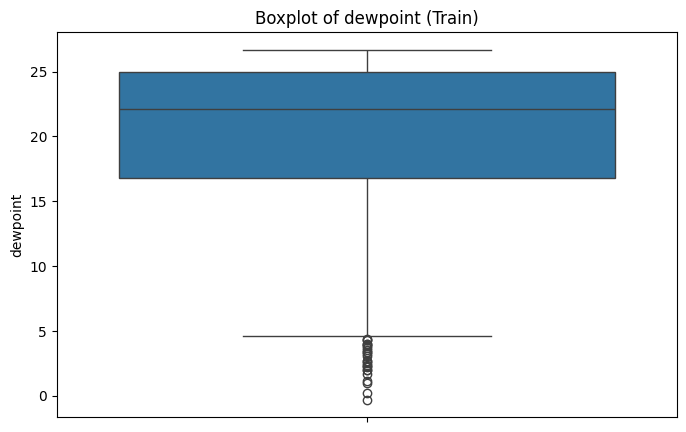

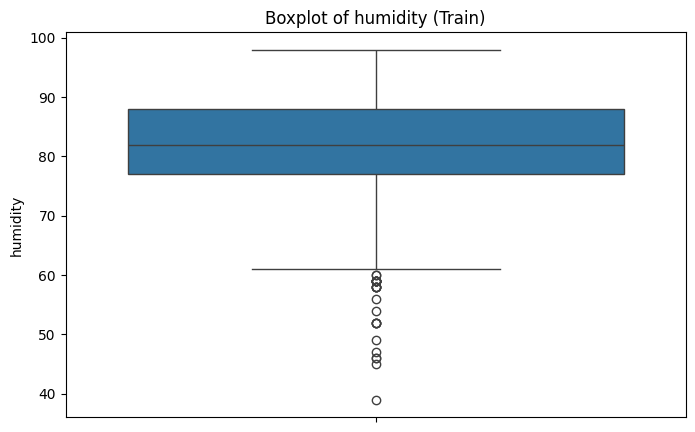

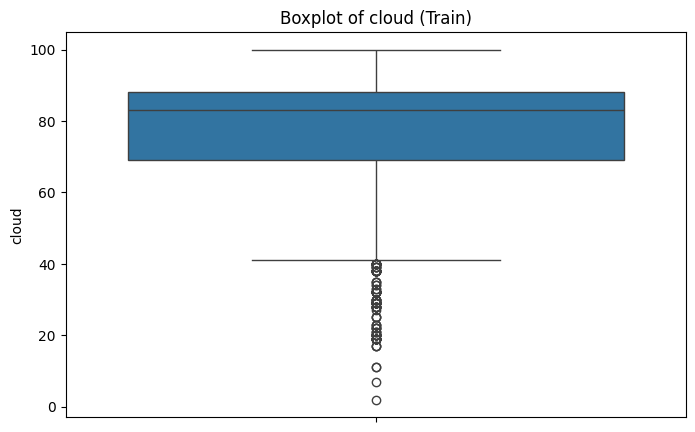

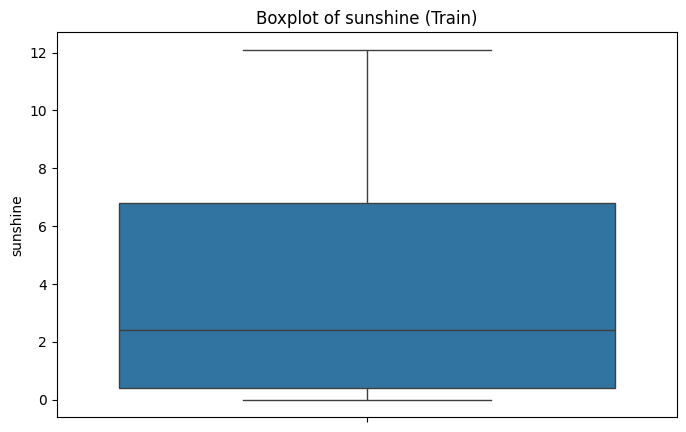

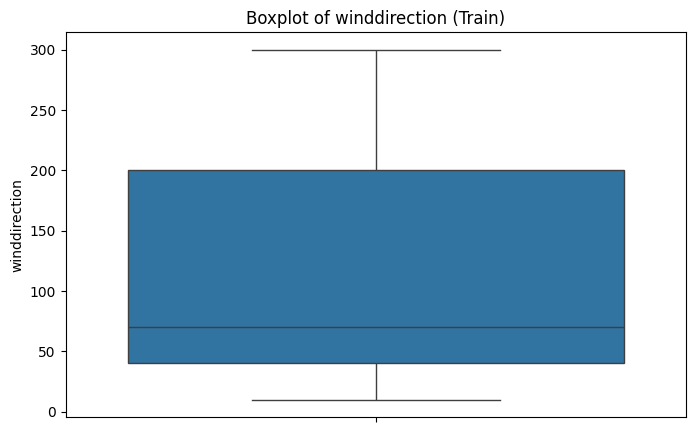

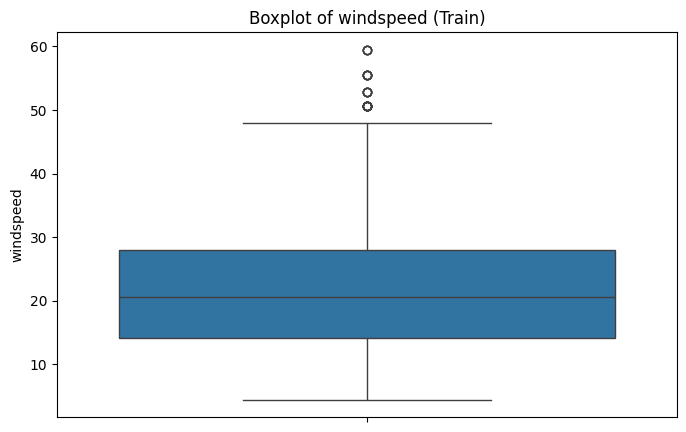

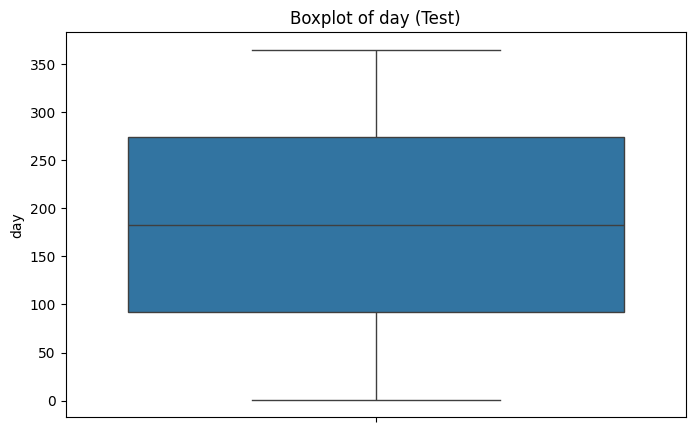

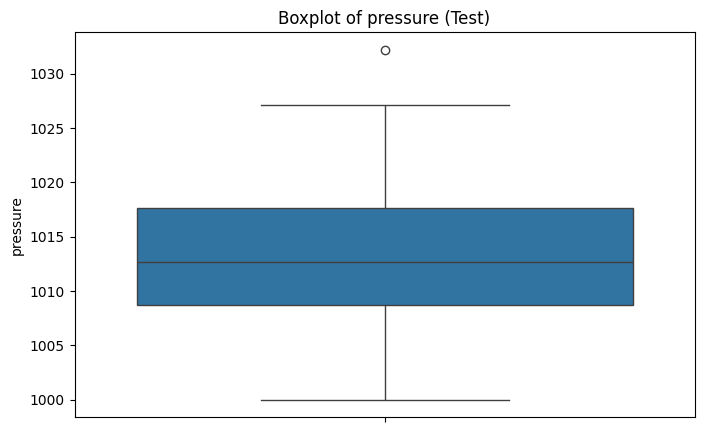

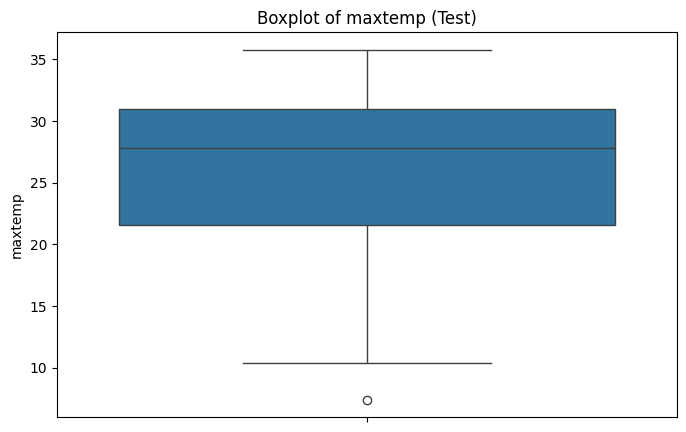

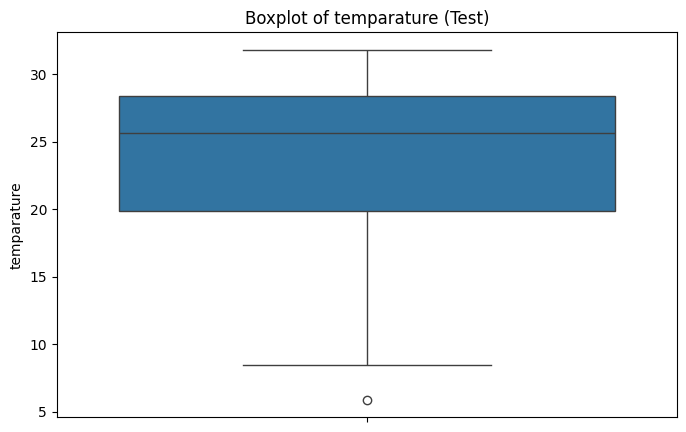

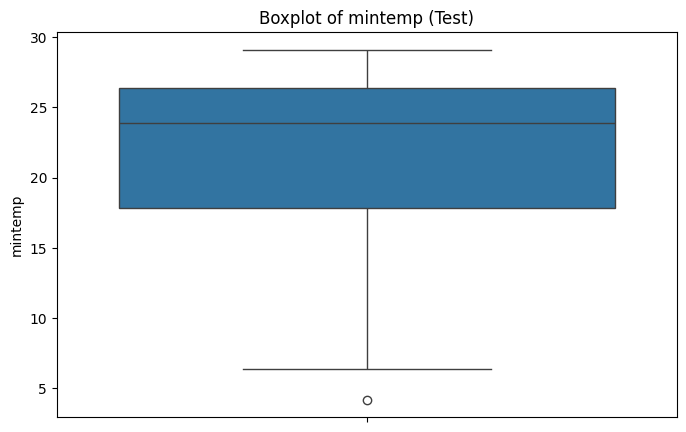

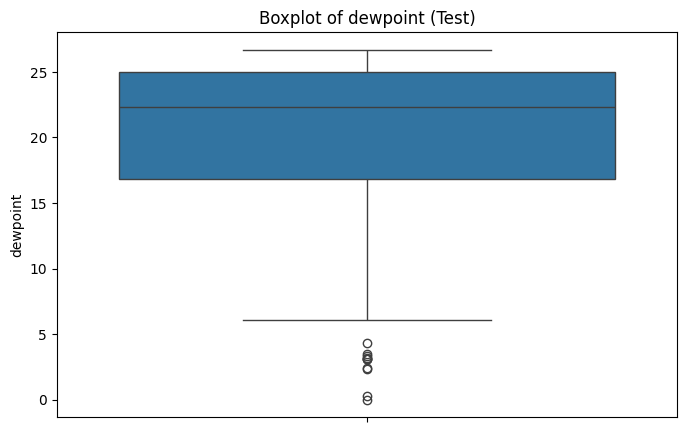

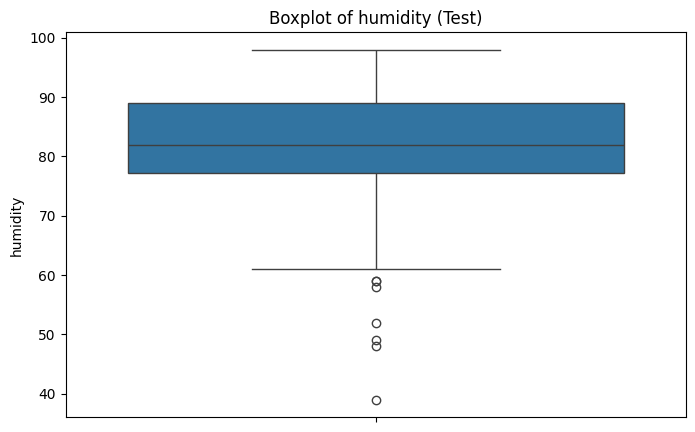

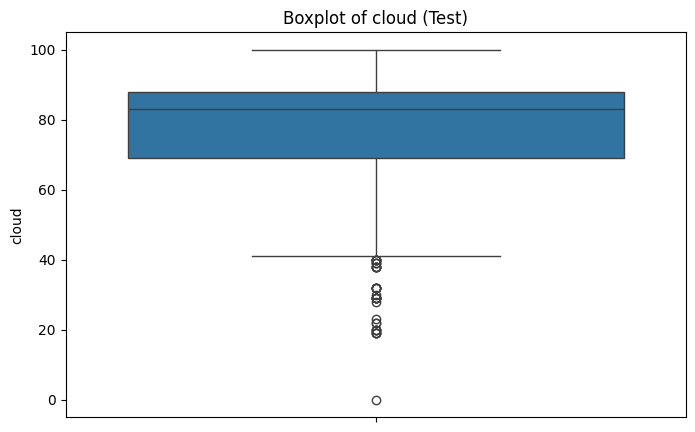

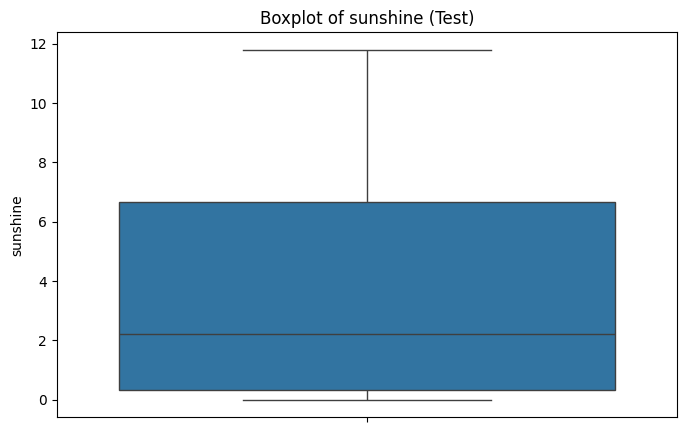

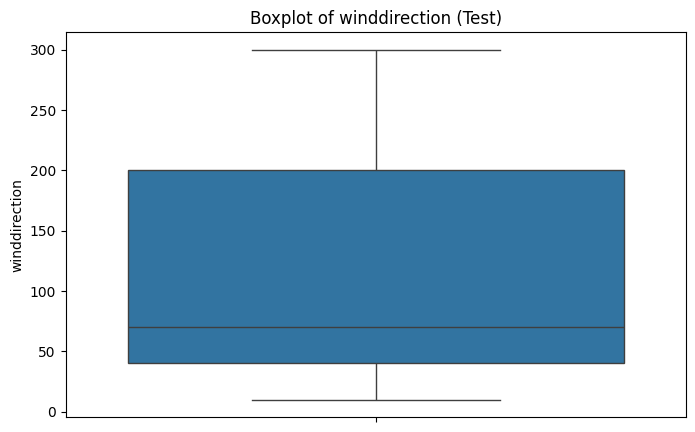

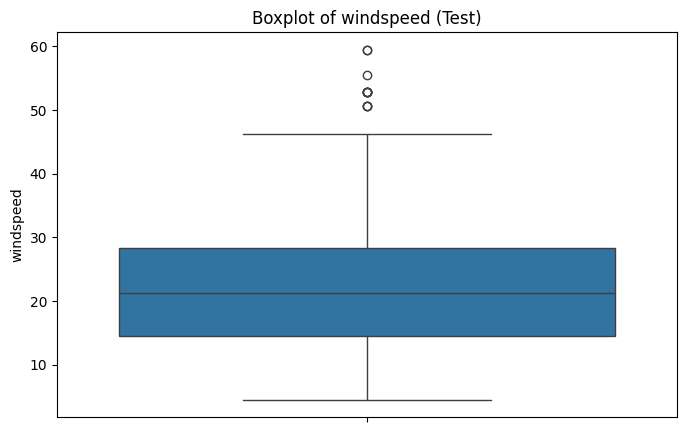

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train[feature])
    plt.title(f'Boxplot of {feature} (Train)')
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=test[feature])
    plt.title(f'Boxplot of {feature} (Test)')
    plt.show()

## **Conclusion: Potential Outlier Checks**

The boxplot analysis across all numerical features in both the train and test datasets revealed several instances of potential outliers, particularly in features related to weather conditions.

* **Consistent Outlier Patterns:**
    * Features like `dewpoint`, `humidity`, `cloud`, and `windspeed` consistently exhibited potential outliers with extreme values (very low values for `dewpoint`, `humidity`, and `cloud`, and very high values for `windspeed`) in both the train and test sets. This suggests that these extreme values might be inherent to the data distribution or represent genuine, albeit rare, events.
    * `pressure` and `mintemp` also showed potential outliers in both train and test data, but to a lesser degree.

* **Outliers in Temperature-Related Features:**
    * While `maxtemp` and `temparature` showed no obvious outliers in the train data, the test data revealed single potential outliers with unusually low temperatures. This discrepancy warrants further investigation to understand potential differences in data collection or environmental conditions between the train and test periods.

* **No Outliers in "day" and "winddirection":**
    * The features `day` and `winddirection` showed no obvious outliers in either the train or test sets. This aligns with the expected uniform distribution of `day` and the cyclical nature of `winddirection`.

* **Implications for Modeling:**
    * **Outlier Investigation:** The identified potential outliers should be investigated to determine their nature (errors vs. legitimate extremes).
    * **Outlier Handling Strategy:** Based on the investigation, an appropriate outlier handling strategy should be implemented (e.g., removal, correction, robust modeling techniques).
    * **Consistent Handling:** Outlier handling should be applied consistently across both train and test sets to avoid introducing biases or discrepancies.
    * **Feature Engineering:** Features with skewed distributions or potential outliers might benefit from feature engineering techniques (e.g., transformations, binning, categorical encoding).

* **Further Considerations:**
    * The impact of outlier handling on model performance should be evaluated through rigorous cross-validation and test set evaluation.
    * The root causes of the outliers should be explored to gain a deeper understanding of the data and potential data quality issues.

In summary, the outlier analysis highlighted the importance of careful data preprocessing and feature engineering. Consistent outlier handling across train and test sets is crucial for building robust and reliable predictive models.


# --- Further Outlier Investigation with Isolation Forest and LOF ---

In [4]:
# Concatenate Train and Test for Consistent Outlier Detection
combined = pd.concat([train.drop('rainfall', axis=1), test], ignore_index=True, sort=False)

In [6]:
# Check for NaNs in numerical columns
numerical_cols = combined.select_dtypes(include=np.number).columns
print("NaNs before imputation:")
print(combined[numerical_cols].isnull().sum())

# Impute NaNs with median (or another suitable method)
for col in numerical_cols:
    combined[col].fillna(combined[col].median(), inplace=True)

# Verify NaNs are gone
print("\nNaNs after imputation:")
print(combined[numerical_cols].isnull().sum())

NaNs before imputation:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

NaNs after imputation:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [7]:
# Isolation Forest 
iso_forest = IsolationForest(contamination=0.05, random_state=42) # Adjust contamination as needed
outliers_iso = iso_forest.fit_predict(combined.select_dtypes(include=np.number))

In [8]:
# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination=0.05) # Adjust contamination as needed
outliers_lof = lof.fit_predict(combined.select_dtypes(include=np.number))

# --- Analyze Outlier Results ---

In [11]:
# Create a mask for outliers (combining Isolation Forest and LOF)
outlier_mask = (outliers_iso == -1) | (outliers_lof == -1)

In [10]:
# Count the number of outliers detected
print("Number of outliers detected:", outlier_mask.sum())

Number of outliers detected: 264


In [11]:
# Examine the rows identified as outliers
outlier_rows = combined[outlier_mask]
print("Outlier rows:")
print(outlier_rows.head())

Outlier rows:
    id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
2    2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
4    4    5    1021.8     21.3         18.4     15.2       9.6      52.0   
6    6    7    1022.8     19.5         18.4     15.3      11.3      56.0   
7    7    8    1019.7     15.8         13.6     12.7      11.8      96.0   
13  13   14    1012.5     13.5         12.9     11.6      11.8      87.0   

    cloud  sunshine  winddirection  windspeed  
2    47.0       8.3           70.0       18.1  
4    45.0       3.6           40.0       24.8  
6    46.0       7.6           20.0       28.4  
7   100.0       0.0           50.0       52.8  
13   92.0       0.0           50.0       37.0  


# --- Visualize Outliers ---

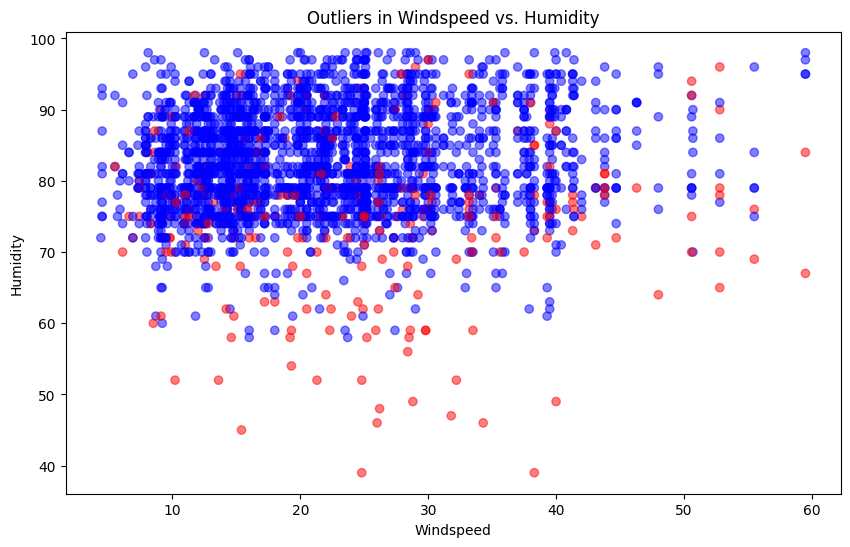

In [ ]:
# Visualize outliers in 'windspeed' vs. 'humidity'
plt.figure(figsize=(10, 6))
plt.scatter(combined['windspeed'], combined['humidity'], c=np.where(outlier_mask, 'red', 'blue'), alpha=0.5)
plt.title("Outliers in Windspeed vs. Humidity")
plt.xlabel("Windspeed")
plt.ylabel("Humidity")
plt.show()

# Add more visualizations as needed for other features

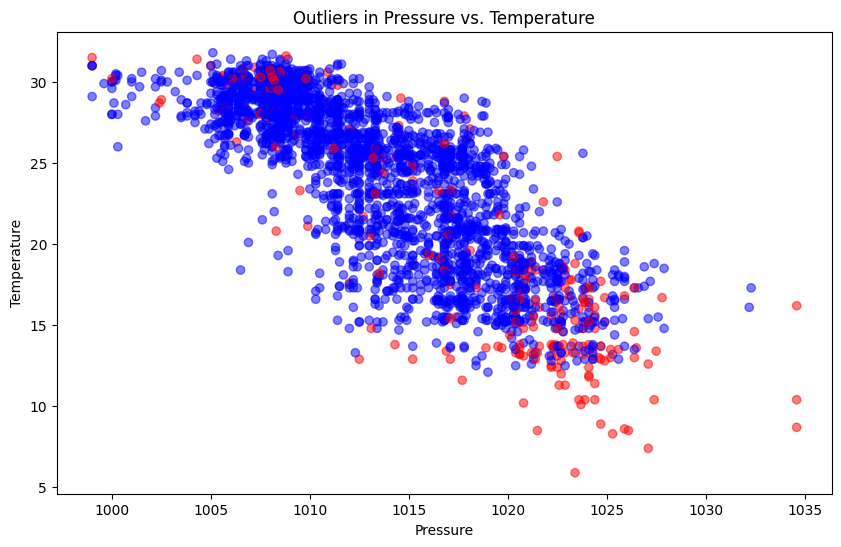

In [15]:
# --- Visualize outliers in 'pressure' vs. 'temparature' ---
plt.figure(figsize=(10, 6))
plt.scatter(combined['pressure'], combined['temparature'], c=np.where(outlier_mask, 'red', 'blue'), alpha=0.5)
plt.title("Outliers in Pressure vs. Temperature")
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

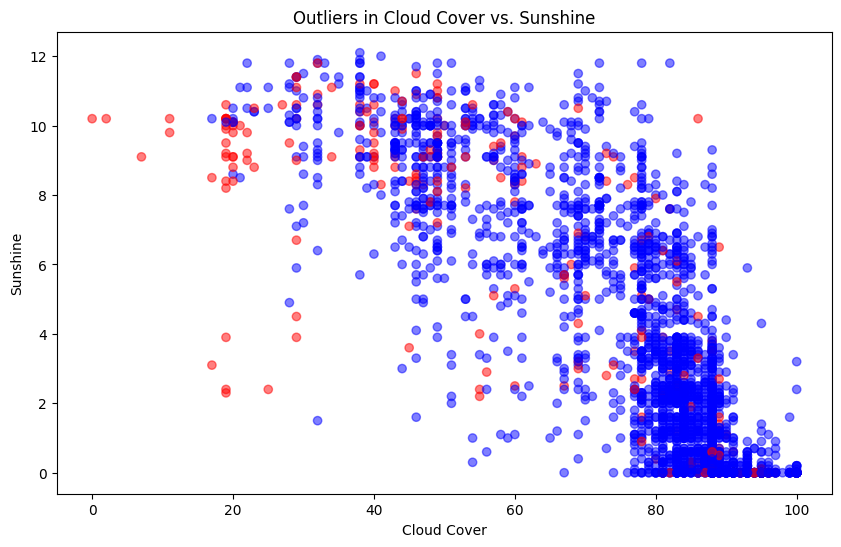

In [16]:
# --- Visualize outliers in 'cloud' vs. 'sunshine' ---
plt.figure(figsize=(10, 6))
plt.scatter(combined['cloud'], combined['sunshine'], c=np.where(outlier_mask, 'red', 'blue'), alpha=0.5)
plt.title("Outliers in Cloud Cover vs. Sunshine")
plt.xlabel("Cloud Cover")
plt.ylabel("Sunshine")
plt.show()

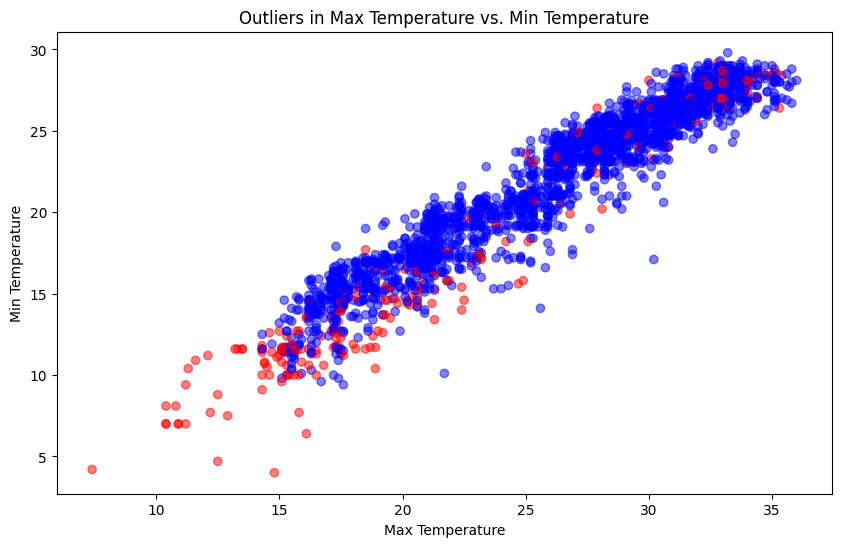

In [17]:
# --- Visualize outliers in 'maxtemp' vs. 'mintemp' ---
plt.figure(figsize=(10, 6))
plt.scatter(combined['maxtemp'], combined['mintemp'], c=np.where(outlier_mask, 'red', 'blue'), alpha=0.5)
plt.title("Outliers in Max Temperature vs. Min Temperature")
plt.xlabel("Max Temperature")
plt.ylabel("Min Temperature")
plt.show()

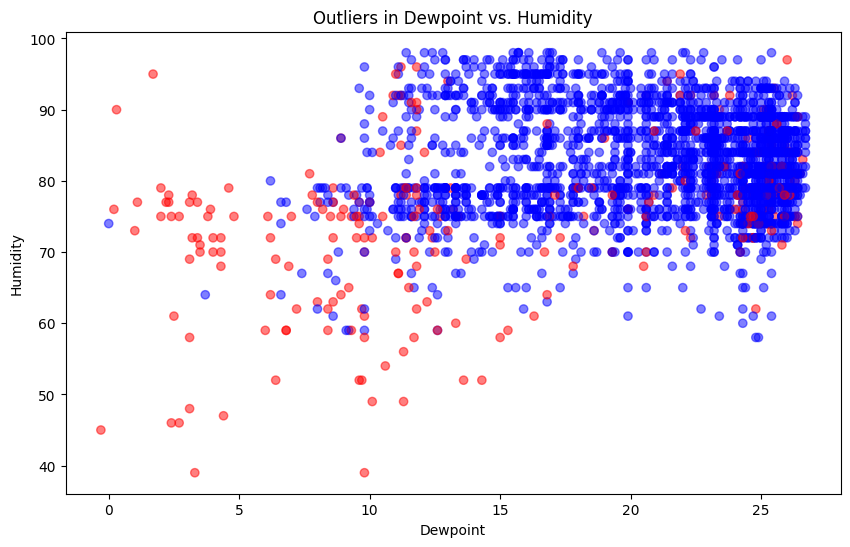

In [18]:
# --- Visualize outliers in 'dewpoint' vs. 'humidity' ---
plt.figure(figsize=(10, 6))
plt.scatter(combined['dewpoint'], combined['humidity'], c=np.where(outlier_mask, 'red', 'blue'), alpha=0.5)
plt.title("Outliers in Dewpoint vs. Humidity")
plt.xlabel("Dewpoint")
plt.ylabel("Humidity")
plt.show()

## **Overall Conclusion: Outlier Visualization Analysis and Recommendations**

The outlier visualizations revealed significant patterns and potential anomalies across various feature pairs, highlighting the importance of careful outlier handling. Here's a summary of the key findings and recommended actions:

**Key Findings:**

* **Feature Interactions:**
    * Outliers often manifested in specific combinations of features, emphasizing the need to consider feature interactions during outlier detection and handling.
* **Potential Data Errors:**
    * Some outliers, particularly those deviating significantly from general trends, may indicate data errors or measurement inconsistencies.
* **Extreme Weather Events:**
    * Other outliers likely represent genuine extreme weather events or unusual atmospheric conditions, which are important to retain for accurate modeling.
* **Specific Feature Pair Patterns:**
    * **Windspeed vs. Humidity:** High windspeed and low humidity combinations were frequently flagged.
    * **Pressure vs. Temperature:** Outliers appeared at extreme ends of the pressure/temperature relationship.
    * **Cloud Cover vs. Sunshine:** Strong negative correlation, with outliers at extreme ends.
    * **Max Temperature vs. Min Temperature:** Strong positive correlation, with outliers at low temperatures and large temperature differences.
    * **Dewpoint vs. Humidity:** Positive correlation, with outliers at low dewpoint and low humidity, and some unusual cases of low dewpoint and high humidity.


# --- Box plots for individual features with outliers highlighted ---

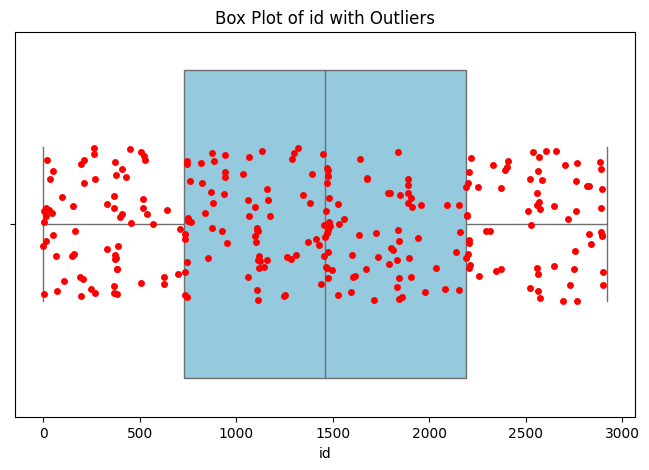

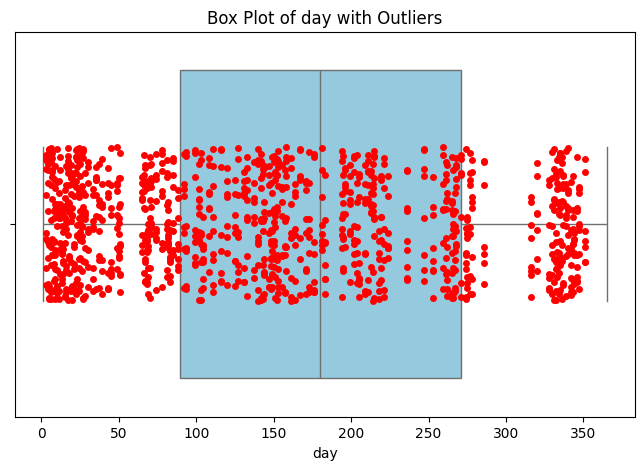

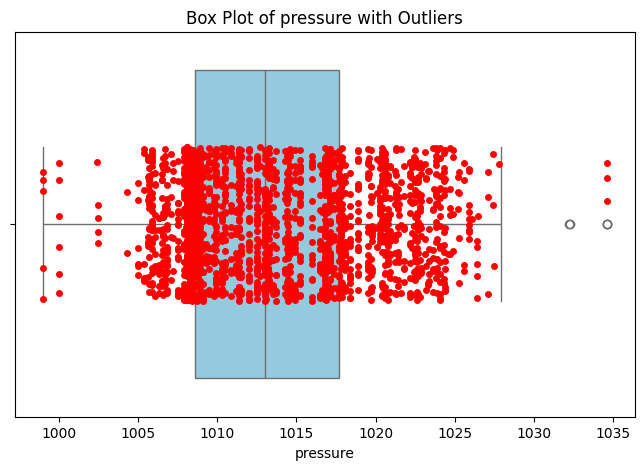

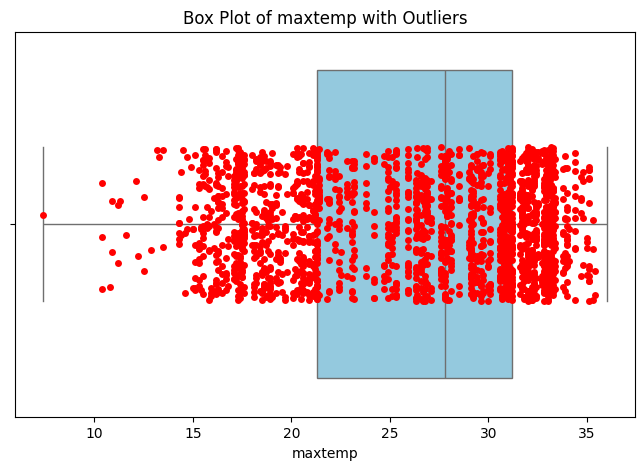

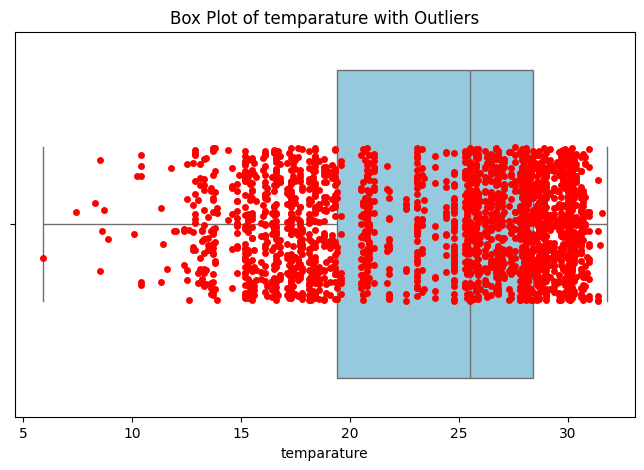

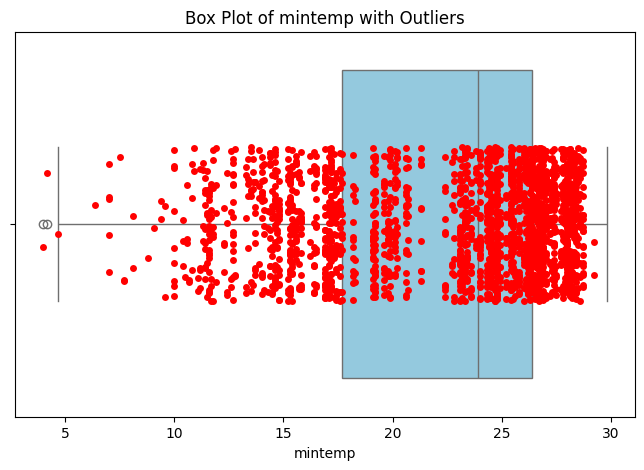

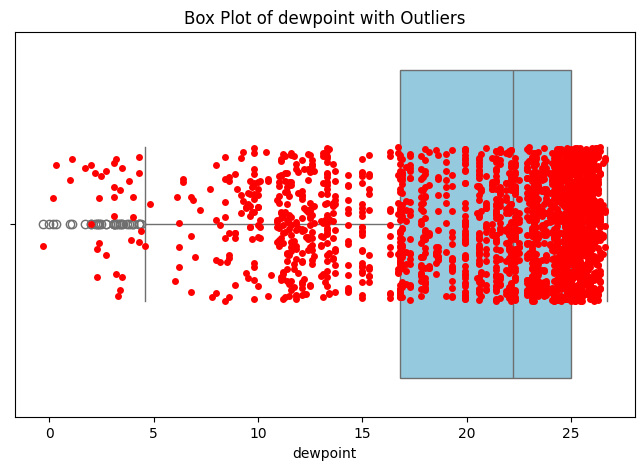

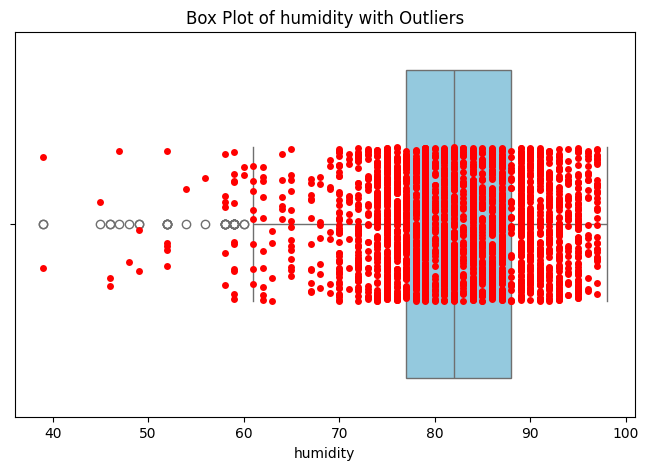

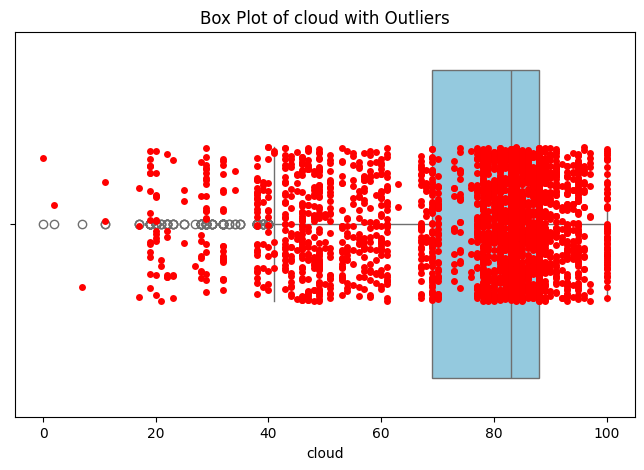

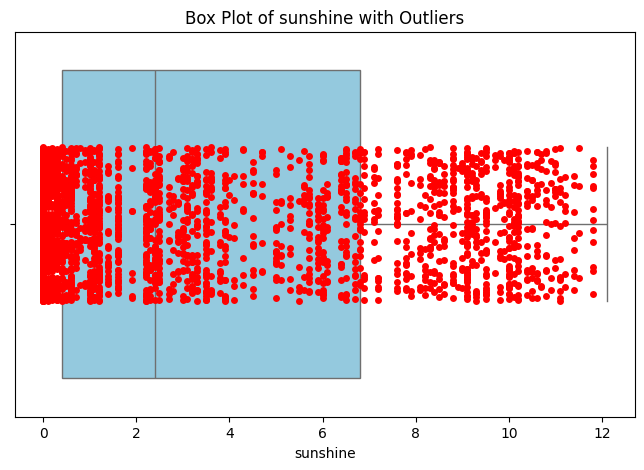

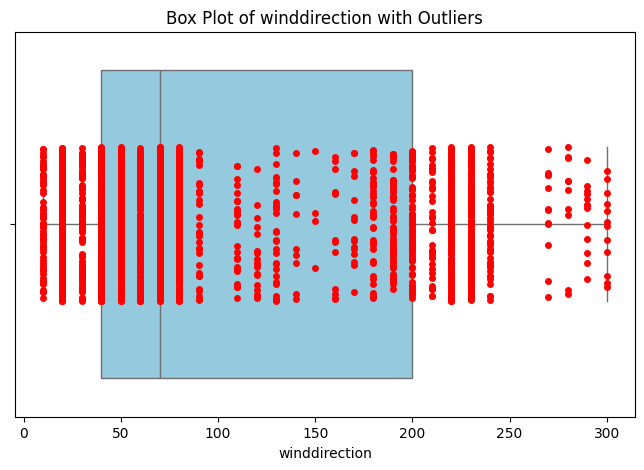

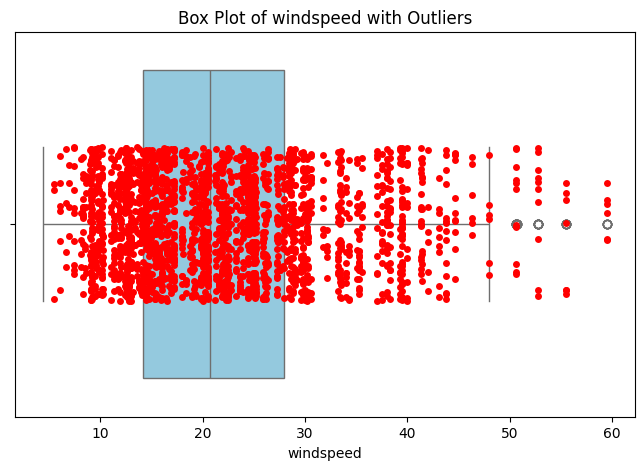

In [ ]:
numerical_cols = combined.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=combined[col], color='skyblue')
    outlier_points = combined[combined[col].isin(combined[outlier_mask][col])]
    sns.stripplot(x=outlier_points[col], color='red', jitter=0.2)
    plt.title(f"Box Plot of {col} with Outliers")
    plt.show()

## **Overall Conclusions: Box Plot Analysis of Individual Features with Outliers**

The box plots, with outliers highlighted, revealed several key patterns and potential issues across the numerical features:

* **"id" and "day":**
    * These features are primarily identifiers or cyclical time components.
    * Outliers detected are likely random artifacts of the outlier detection method.
    * "id" should be removed, and "day" should be cyclically encoded.
* **"pressure", "mintemp", "dewpoint", "humidity", "cloud", "windspeed":**
    * These features exhibited both slight deviations from the typical range and extreme outliers.
    * Extreme outliers were observed on the lower or higher ends of the distributions.
    * Slight deviations were concentrated around the main distribution.
* **"maxtemp", "temparature", "sunshine":**
    * These features showed outliers concentrated around the main distribution, indicating slight deviations.
    * "sunshine" showed a heavily left skewed distribution.
* **"winddirection":**
    * This is a cyclical feature, and the outliers are randomly distributed.
    * This feature should be cyclically encoded.

**Overall Recommendations:**

1.  **Address Extreme Outliers:**
    * Carefully investigate the extreme outliers in "pressure", "mintemp", "dewpoint", "humidity", "cloud", and "windspeed" to determine if they are errors or genuine extreme values.
    * If they are errors, consider removal or correction.
    * If they are genuine, consider using robust modeling techniques.

2.  **Handle Slight Deviations:**
    * For slight deviations in "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", and "windspeed", consider capping or transformations to reduce their impact.

3.  **Transform Skewed Data:**
    * Apply a transformation, such as a log transformation, to the "sunshine" feature to address its skewed distribution.

4.  **Cyclical Encoding:**
    * Apply sine and cosine transformations to the "day" and "winddirection" features to represent their cyclical nature.

5.  **Remove "id" Feature:**
    * Remove the "id" feature as it has no predictive value and can introduce noise.

6.  **Evaluate Impact:**
    * Evaluate the impact of different outlier handling and transformation strategies on model performance using appropriate evaluation metrics.

7.  **Maintain Consistency:**
    * Ensure that any outlier handling or transformation strategy is applied consistently to both the train and test sets.

8.  **Feature Engineering:**
    * Consider creating interaction or difference features between related features (e.g., temperature-related features, humidity-related features, cloud and sunshine) to improve model performance.

9.  **Robust Modeling:**
    * Consider using robust modeling techniques that are less sensitive to outliers.


# --- Histograms for individual features with outliers highlighted ---

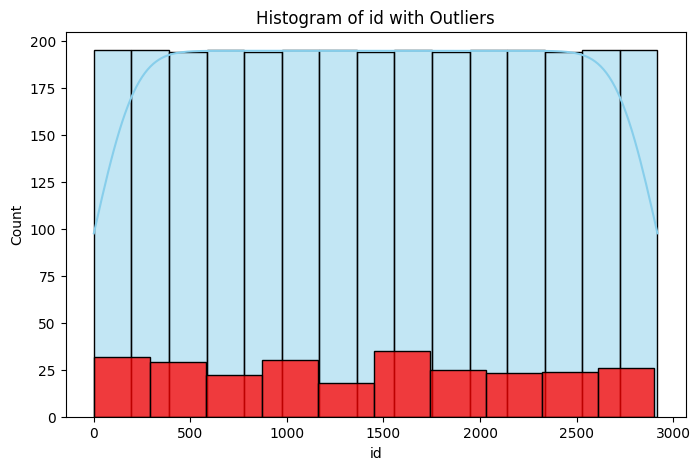

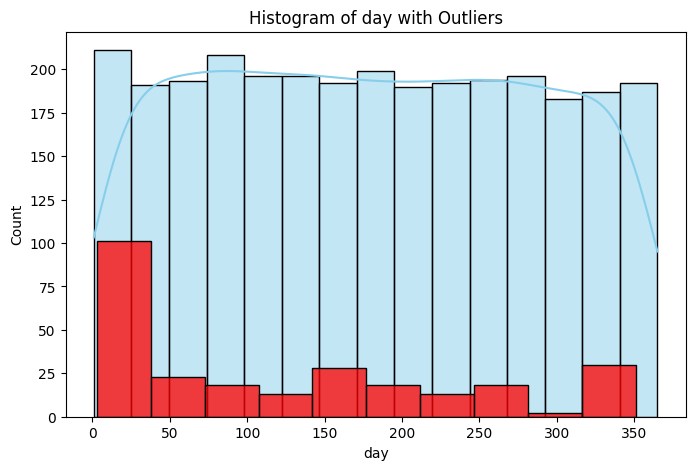

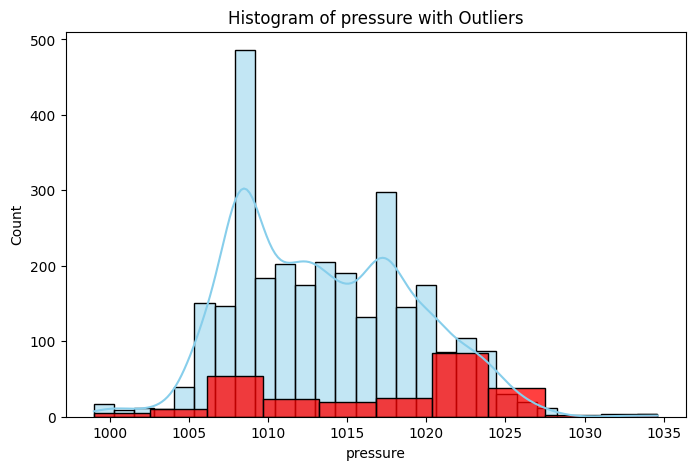

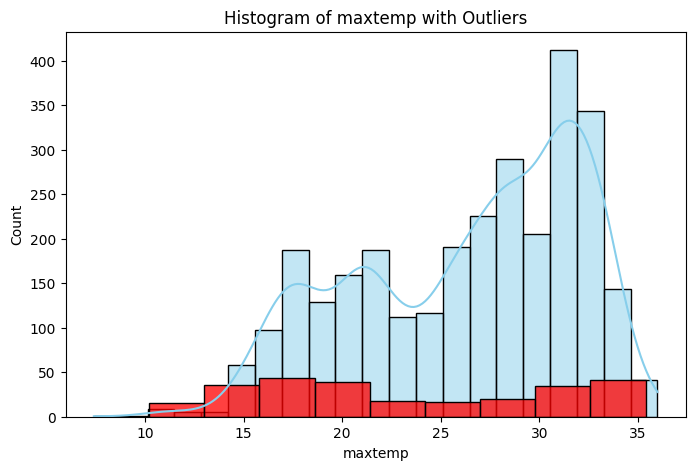

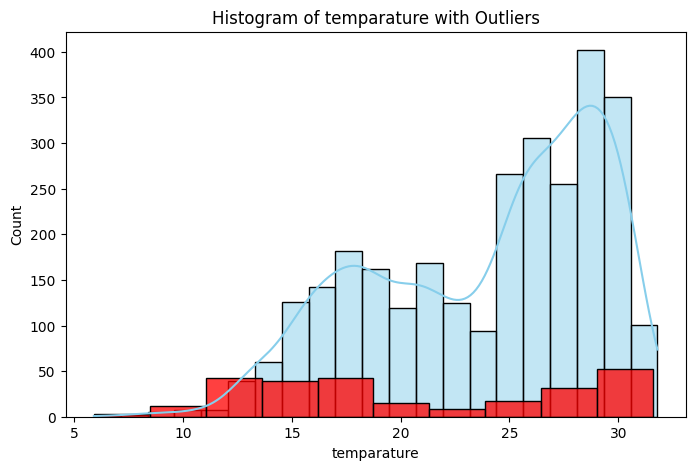

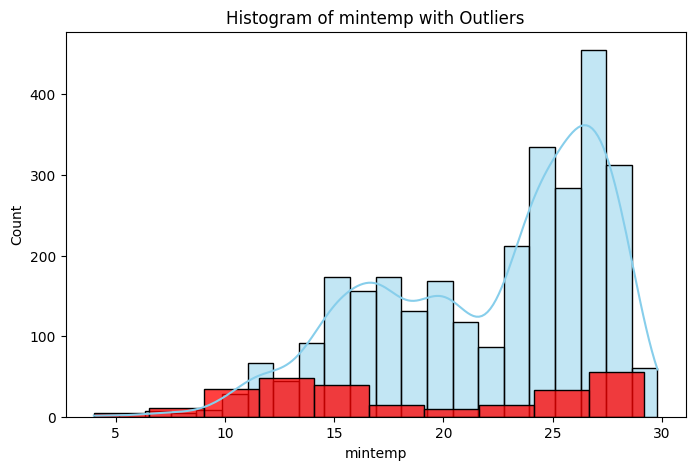

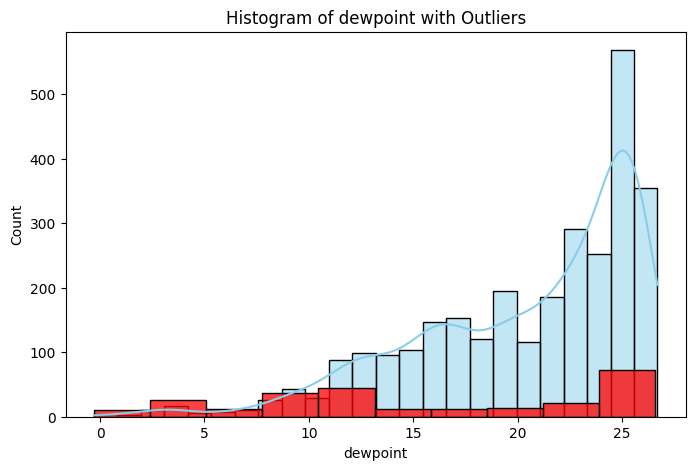

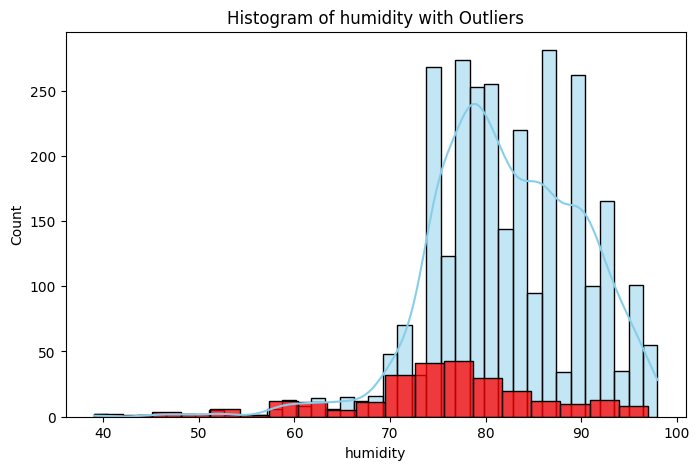

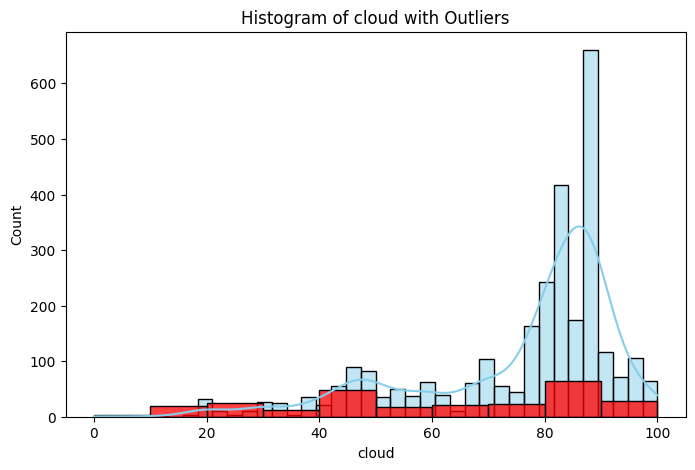

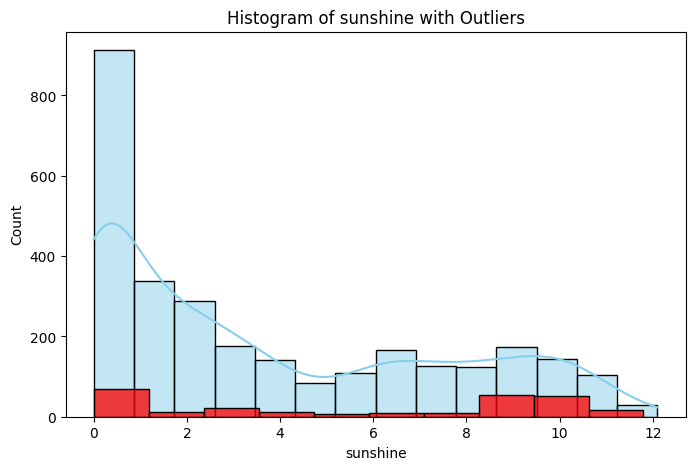

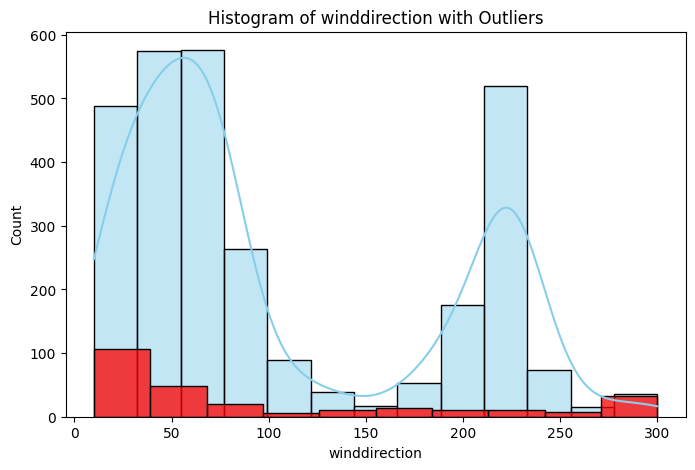

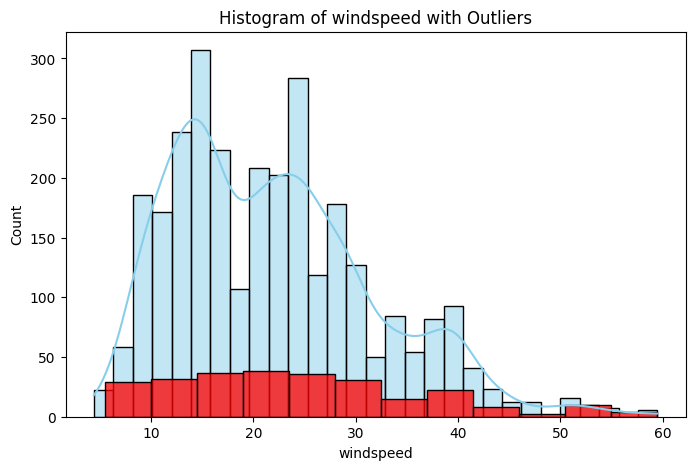

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(combined[col], color='skyblue', kde=True)
    sns.histplot(combined[col][outlier_mask], color='red', kde=False)
    plt.title(f"Histogram of {col} with Outliers")
    plt.show()

Absolutely. Let's synthesize the overall conclusions from the histogram analysis of individual features with outliers highlighted, and provide actionable recommendations.

**Overall Conclusions: Histogram Analysis of Individual Features with Outliers**

The histograms, with outliers highlighted, revealed several key patterns and potential issues across the numerical features:

* **"id":**
    * Uniform distribution of values and outliers.
    * "id" is an identifier and should be removed.
* **"day":**
    * Relatively uniform distribution of values and outliers.
    * "day" is a cyclical feature and should be cyclically encoded.
* **"maxtemp", "temparature", "mintemp":**
    * Bimodal distributions, indicating two distinct groups of temperature values.
    * Outliers distributed across both modes.
* **"dewpoint", "windspeed":**
    * Right-skewed distributions, with a long tail towards higher values.
    * Outliers distributed across the range.
* **"humidity":**
    * Left-skewed distribution, with a long tail towards lower values.
    * Outliers distributed across the range.
* **"cloud":**
    * Bimodal distribution.
    * Outliers distributed across the range.
* **"sunshine":**
    * Heavily right-skewed distribution.
    * Outliers distributed across the range.
* **"winddirection":**
    * Bimodal distribution, indicating two dominant wind directions.
    * Outliers distributed across the range.

**Overall Recommendations:**

1.  **Remove "id" Feature:**
    * The "id" feature should be removed as it has no predictive value and can introduce noise.

2.  **Cyclical Encoding:**
    * Apply sine and cosine transformations to the "day" and "winddirection" features to represent their cyclical nature.

3.  **Address Skewness:**
    * Apply transformations, such as logarithmic transformations, to "dewpoint", "windspeed", and "sunshine" to reduce skewness and improve model performance.
    * Apply a reflection and log transformation to the "humidity" feature.

4.  **Handle Bimodal Distributions:**
    * Investigate the underlying causes of the bimodal distributions in "maxtemp", "temparature", "mintemp", and "cloud".
    * Consider feature engineering or modeling techniques that can capture these patterns.

5.  **Consider Capping or Transformations for Outliers:**
    * For features with outliers spread across the distribution, consider capping or transformations to reduce their impact.
    * Evaluate the impact of these changes.


# --- 7. Analyze Outlier Distribution ---

In [13]:
# Example: Examine the distribution of outliers across features
outlier_distribution = combined[outlier_mask].describe()
print("Outlier distribution:")
print(outlier_distribution)

Outlier distribution:
                id         day     pressure     maxtemp  temparature  \
count   264.000000  264.000000   264.000000  264.000000   264.000000   
mean   1405.500000  122.571970  1016.959470   23.050000    20.458333   
std     862.247766  113.172714     7.288299    7.425396     7.157586   
min       2.000000    3.000000   999.000000    7.400000     5.900000   
25%     727.500000   17.000000  1009.100000   16.500000    13.800000   
50%    1452.500000   86.500000  1019.650000   21.300000    18.400000   
75%    2166.500000  209.000000  1022.900000   30.925000    28.125000   
max    2901.000000  351.000000  1034.600000   35.400000    31.600000   

          mintemp    dewpoint    humidity       cloud    sunshine  \
count  264.000000  264.000000  264.000000  264.000000  264.000000   
mean    18.363258   15.368939   75.098485   60.590909    5.686364   
std      7.146440    8.190304   10.834293   26.229016    4.177684   
min      4.000000   -0.300000   39.000000    0.000000

This output provides a descriptive statistical summary of the outliers detected in your dataset. Let's break down the information and draw conclusions:

**Analysis of Outlier Distribution Statistics:**

* **Count (264):**
    * The count of 264 indicates that 264 data points were identified as outliers across all the numerical features. This is a significant number, representing a substantial portion of your dataset.
* **"id" and "day":**
    * As we discussed earlier, these features have no useful information. The id is an index and day is cyclical. The mean, standard deviation, and min/max values are just statistical measures of their ranges.
* **"pressure":**
    * The outliers in "pressure" have a mean close to the overall mean, but a slightly wider range. This suggests that the outliers include both slightly higher and slightly lower pressure values.
    * The min and max values are outside a typical range of pressure. This supports the boxplot conclusion, that there are extreme outliers.
* **"maxtemp", "temparature", "mintemp":**
    * The mean values of these temperature features are relatively close to their overall means, but the ranges are wider.
    * The min and max values are significantly far from the mean, showing that there are low and high temperature outliers.
* **"dewpoint":**
    * The mean dewpoint of the outliers is close to the overall mean, but the range is wider.
    * There are some very low dewpoint outliers.
* **"humidity":**
    * The mean humidity of the outliers is close to the overall mean, but the range is wider.
    * There are some very low humidity outliers.
* **"cloud":**
    * The mean cloud cover of the outliers is close to the overall mean, but the range is wider.
    * There are outliers at both very low and very high cloud cover values.
* **"sunshine":**
    * The mean sunshine of the outliers is lower than the overall mean, and the range is wide.
    * There are many outliers with low sunshine values.
* **"winddirection":**
    * The outliers are spread across the entire range of wind directions.
* **"windspeed":**
    * The mean windspeed of the outliers is close to the overall mean, but the range is wider.
    * There are some very high windspeed outliers.

**Key Conclusions and Recommendations:**

1.  **Significant Outlier Presence:**
    * The large number of outliers (264) indicates a need for careful outlier handling.

2.  **"id" Removal:**
    * The "id" feature should be removed.

3.  **Cyclical Encoding:**
    * The "day" and "winddirection" features should be cyclically encoded using sine and cosine transformations.

4.  **Extreme Value Investigation:**
    * The extreme outliers in "pressure", "mintemp", "dewpoint", "humidity", and "windspeed" should be investigated to determine if they are errors or genuine extreme events.

5.  **Transformation Consideration:**
    * The skewness of the sunshine feature requires a transformation.
    * Consider transformations for other features as needed.

6.  **Capping or Robust Modeling:**
    * For features with outliers that are not extreme errors, consider capping or using robust modeling techniques.

7.  **Impact Evaluation:**
    * Evaluate the impact of different outlier handling strategies on model performance.

8.  **Feature Engineering:**
    * Consider creating interaction or difference features between related features.

9.  **Bimodal Distribution:**
    * Investigate the bimodal distribution of cloud, and the temperature columns.
